In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sma
from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson
from sklearn.model_selection import RandomizedSearchCV

In [344]:
train=pd.read_csv(r"C:\Users\hp\Downloads\train_BRCpofr.csv")

In [345]:
train

id  gender   area qualification         income  marital_status  \
0          1    Male  Urban      Bachelor         5L-10L               1   
1          2    Male  Rural   High School         5L-10L               0   
2          3    Male  Urban      Bachelor         5L-10L               1   
3          4  Female  Rural   High School         5L-10L               0   
4          5    Male  Urban   High School  More than 10L               1   
...      ...     ...    ...           ...            ...             ...   
89387  89388    Male  Rural   High School  More than 10L               0   
89388  89389    Male  Urban      Bachelor         5L-10L               1   
89389  89390  Female  Urban      Bachelor         5L-10L               0   
89390  89391  Female  Rural   High School          2L-5L               0   
89391  89392  Female  Rural   High School         5L-10L               0   

       vintage  claim_amount num_policies policy type_of_policy    cltv  
0            5          5790  More than 1      A       Platinum   64308  
1            8          5080  More than 1      A       Platinum  515400  
2            8          2599  More than 1      A       Platinum   64212  
3            7             0  More than 1      A       Platinum   97920  
4            6          3508  More than 1      A           Gold   59736  
...        ...           ...          ...    ...            ...     ...  
89387        6             0  More than 1      B       Platinum   95736  
89388        0          3897  More than 1      A       Platinum   67596  
89389        4          3363  More than 1      B       Platinum  114120  
89390        8             0  More than 1      B       Platinum   71772  
89391        6             0  More than 1      B           Gold  108144  

[89392 rows x 12 columns]

In [346]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [347]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [348]:
train.describe()

id  marital_status       vintage  claim_amount           cltv
count  89392.000000    89392.000000  89392.000000  89392.000000   89392.000000
mean   44696.500000        0.575488      4.595669   4351.502416   97952.828978
std    25805.391969        0.494272      2.290446   3262.359775   90613.814793
min        1.000000        0.000000      0.000000      0.000000   24828.000000
25%    22348.750000        0.000000      3.000000   2406.000000   52836.000000
50%    44696.500000        1.000000      5.000000   4089.000000   66396.000000
75%    67044.250000        1.000000      6.000000   6094.000000  103440.000000
max    89392.000000        1.000000      8.000000  31894.000000  724068.000000

In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [350]:
# univariate distribution

In [351]:
# converting dtype of marital status as object

In [352]:
train['marital_status']=train['marital_status'].astype(object)

In [353]:
num_cols=train.select_dtypes(include=np.number).columns
num_cols

Index(['id', 'vintage', 'claim_amount', 'cltv'], dtype='object')

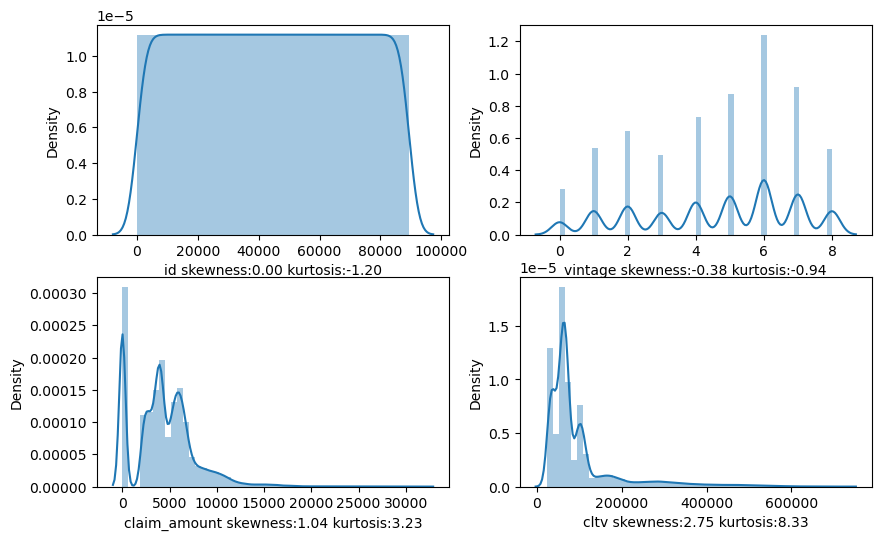

In [354]:
plt.figure(figsize=[10,6])
c=1
for i in num_cols:
    plt.subplot(2,2,c)
    sns.distplot(train[i])
    plt.xlabel('%s skewness:%.2f kurtosis:%.2f'%(i,train[i].skew(),train[i].kurt()))
    c=c+1

In [355]:
# id column has uniform distribution as also this ciolumn will be eliminated befor model fitting
# since vintage refers to the no of year since first policy date so object dtype is best suited for it
# Also client with 6 years of vintage are more in number
# Most of the clients doesn't claim for the amount
# most of the client have cltv range 30,000-60,000 

In [356]:
# vintage attribute dtype is best suited for object type datatype
train['vintage']=train['vintage'].astype(object)

In [357]:
train['claim_amount'].unique()

array([ 5790,  5080,  2599, ..., 15361, 12911, 17143], dtype=int64)

In [358]:
# univariate analysis for categorical feature

In [359]:
cat_cols=train.select_dtypes(include=object)

In [360]:
cat_cols

gender   area qualification         income marital_status vintage  \
0        Male  Urban      Bachelor         5L-10L              1       5   
1        Male  Rural   High School         5L-10L              0       8   
2        Male  Urban      Bachelor         5L-10L              1       8   
3      Female  Rural   High School         5L-10L              0       7   
4        Male  Urban   High School  More than 10L              1       6   
...       ...    ...           ...            ...            ...     ...   
89387    Male  Rural   High School  More than 10L              0       6   
89388    Male  Urban      Bachelor         5L-10L              1       0   
89389  Female  Urban      Bachelor         5L-10L              0       4   
89390  Female  Rural   High School          2L-5L              0       8   
89391  Female  Rural   High School         5L-10L              0       6   

      num_policies policy type_of_policy  
0      More than 1      A       Platinum  
1      More than 1      A       Platinum  
2      More than 1      A       Platinum  
3      More than 1      A       Platinum  
4      More than 1      A           Gold  
...            ...    ...            ...  
89387  More than 1      B       Platinum  
89388  More than 1      A       Platinum  
89389  More than 1      B       Platinum  
89390  More than 1      B       Platinum  
89391  More than 1      B           Gold  

[89392 rows x 9 columns]

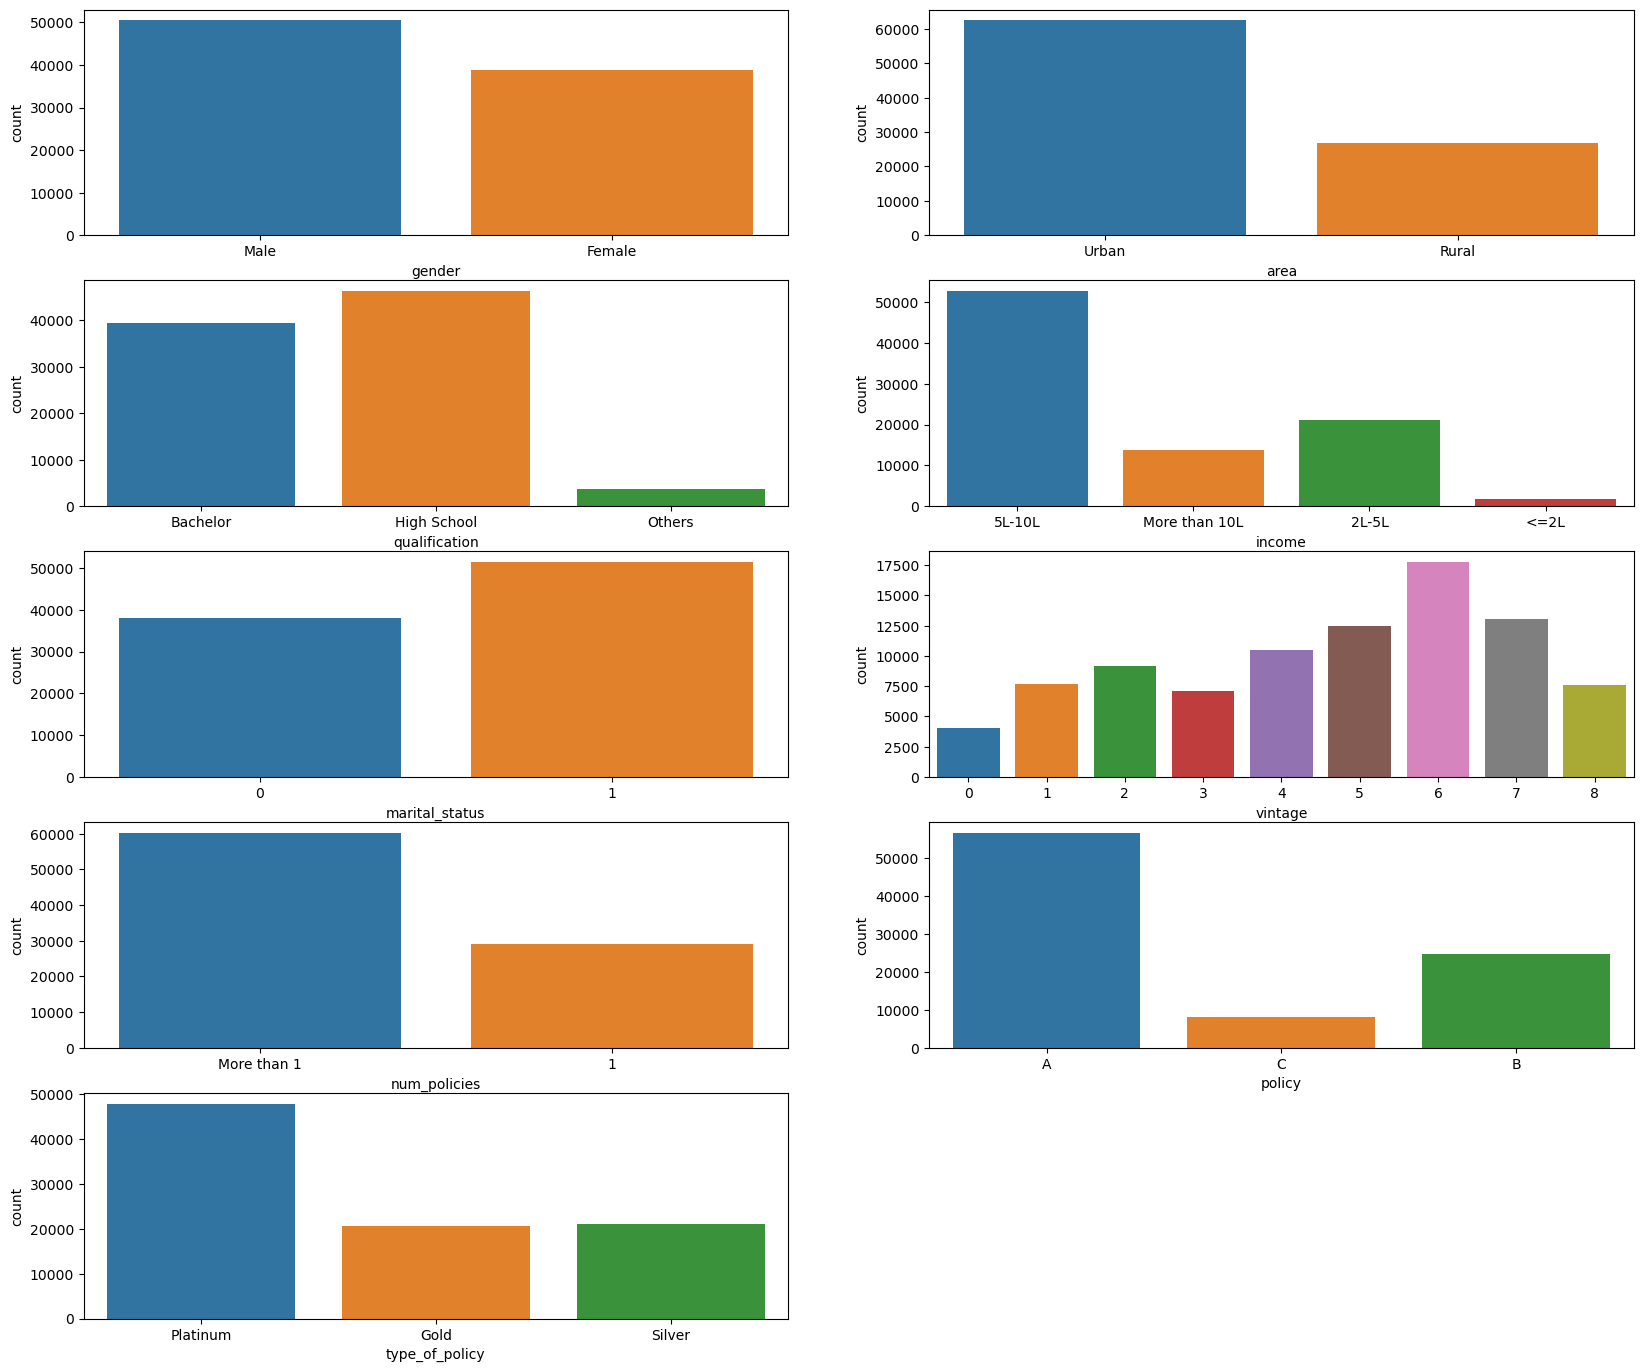

In [361]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
    plt.subplot(5,2,c)
    sns.countplot(train[i])
    c=c+1

In [362]:
# Most of the clients are male
# most of the clients are living in urban areas
# Most of clients have high school certificatio
# most of the clients earn 5-10 l
# mostly are married
# Mostly clients are in relationship with bussiness around 6 yrs
# mostly availed more than 1 policy 
# A policy is a type of interests of clients
# Platinum  policy holder accounts more


In [363]:
# Bivariate plot

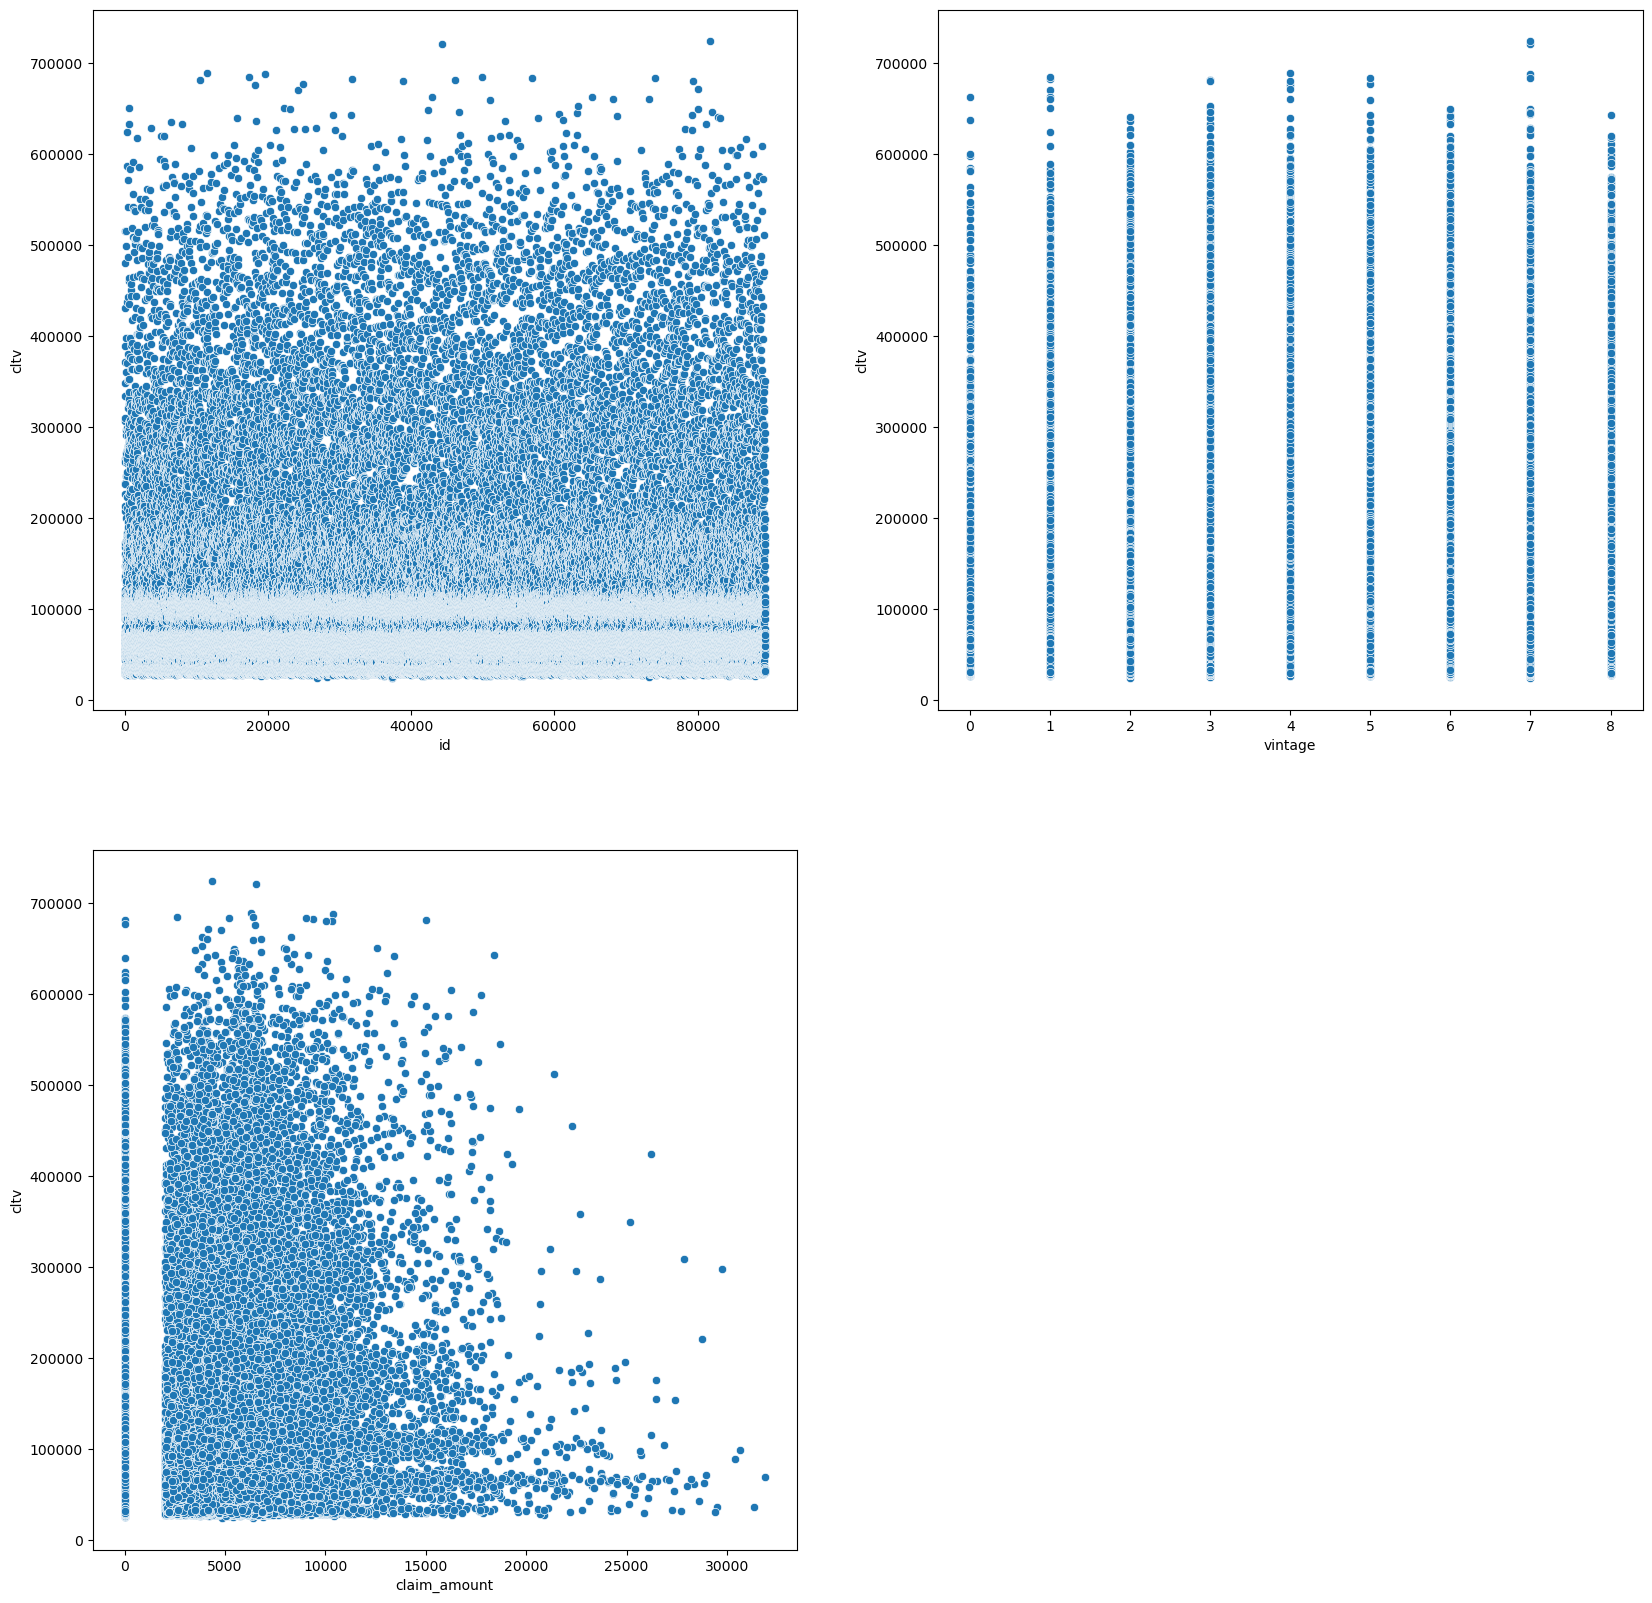

In [364]:
plt.figure(figsize=[20,20])
c=1
for i in num_cols:
    if i != 'cltv':
        plt.subplot(2,2,c)
        sns.scatterplot(x=train[i],y=train['cltv'])
        c=c+1

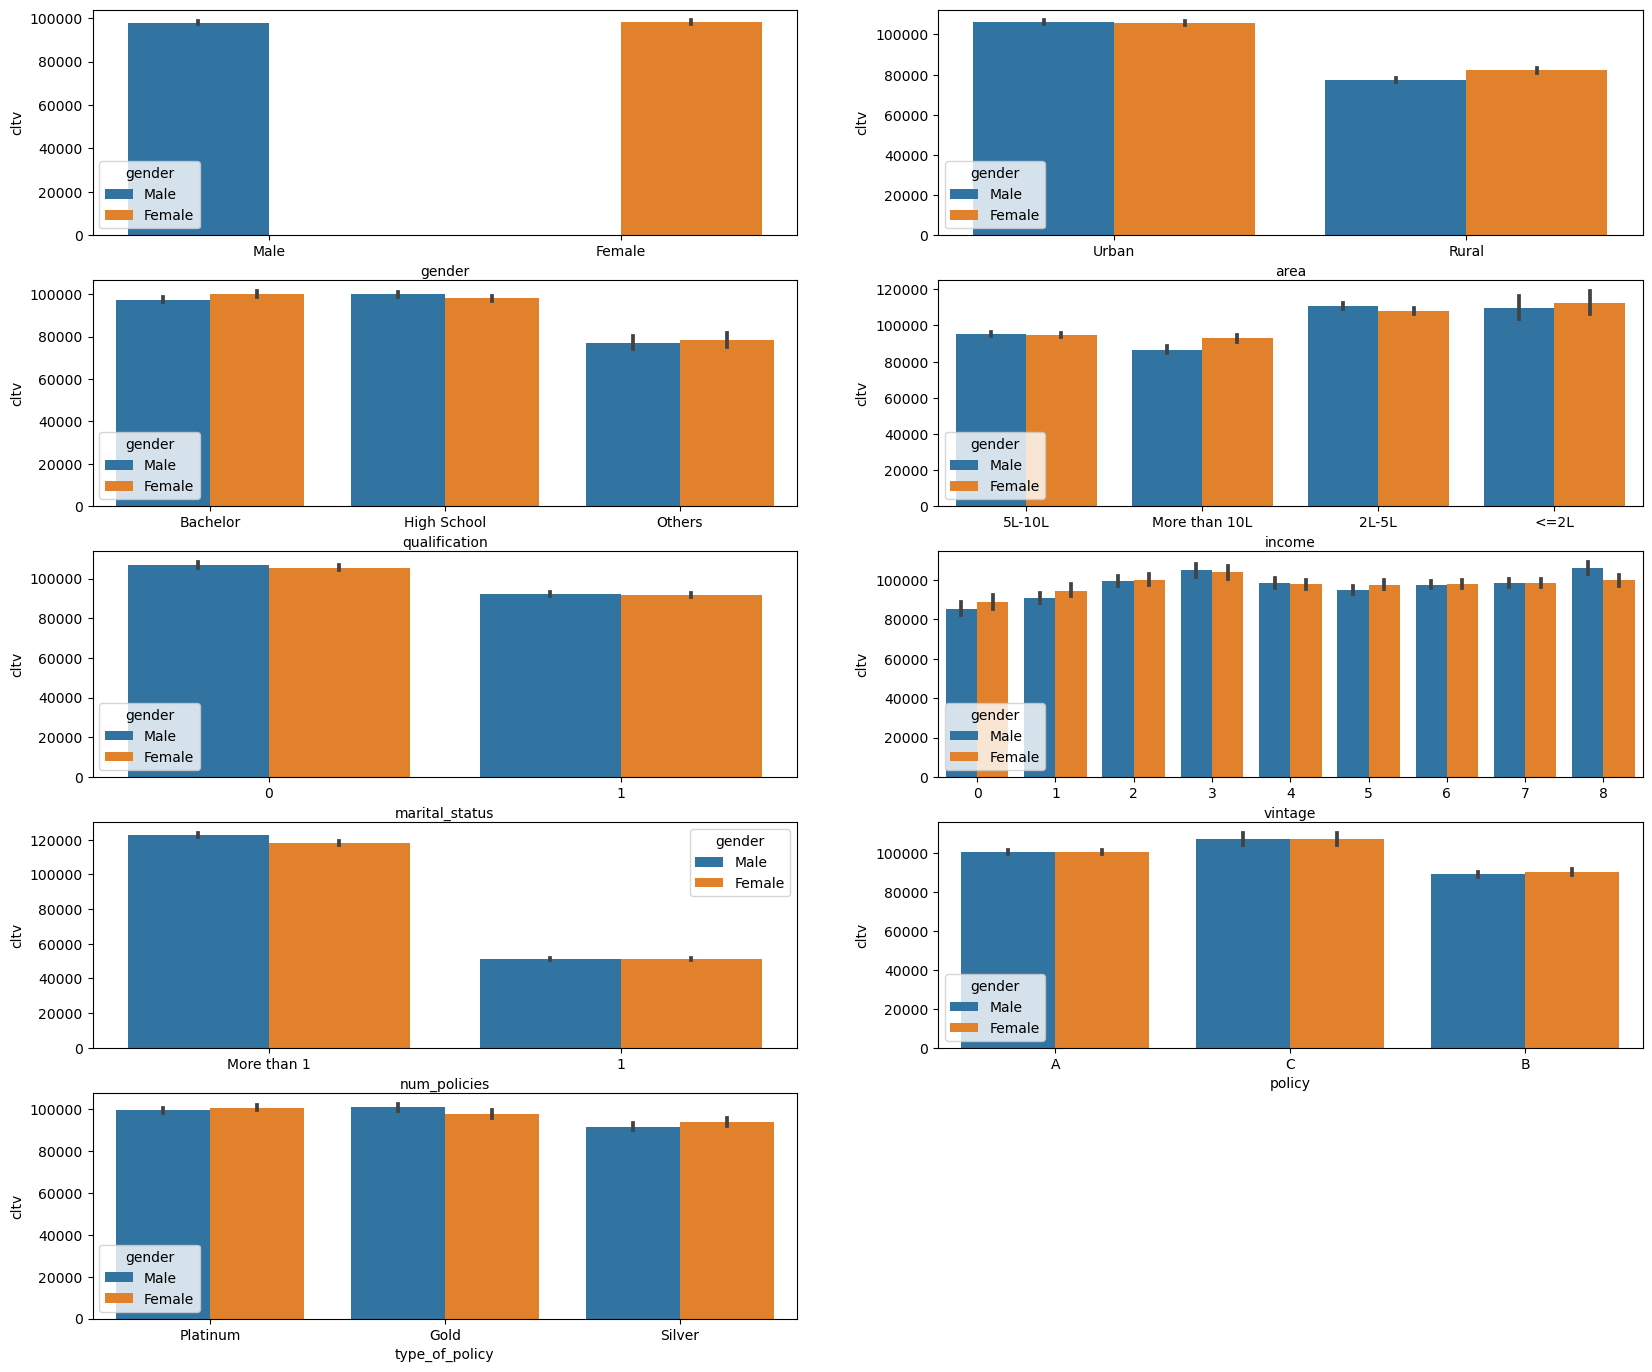

In [365]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['gender'])
        c=c+1

In [366]:
#1) from above countplot it is clearly seen that the gender is not causing any influence in any feature realted study
# meaning that both male and female have equal proption of each area of study(almost equal proprtion for example 
# in marital status considering the records of the male and female showing same cltv relation that is around 1100000)
# 2)As compared to males count females count is less and after that it is equally contributing in cltv 
# 3)Though there is less count of females as compared with males females contributing more in platinum
# type policy 


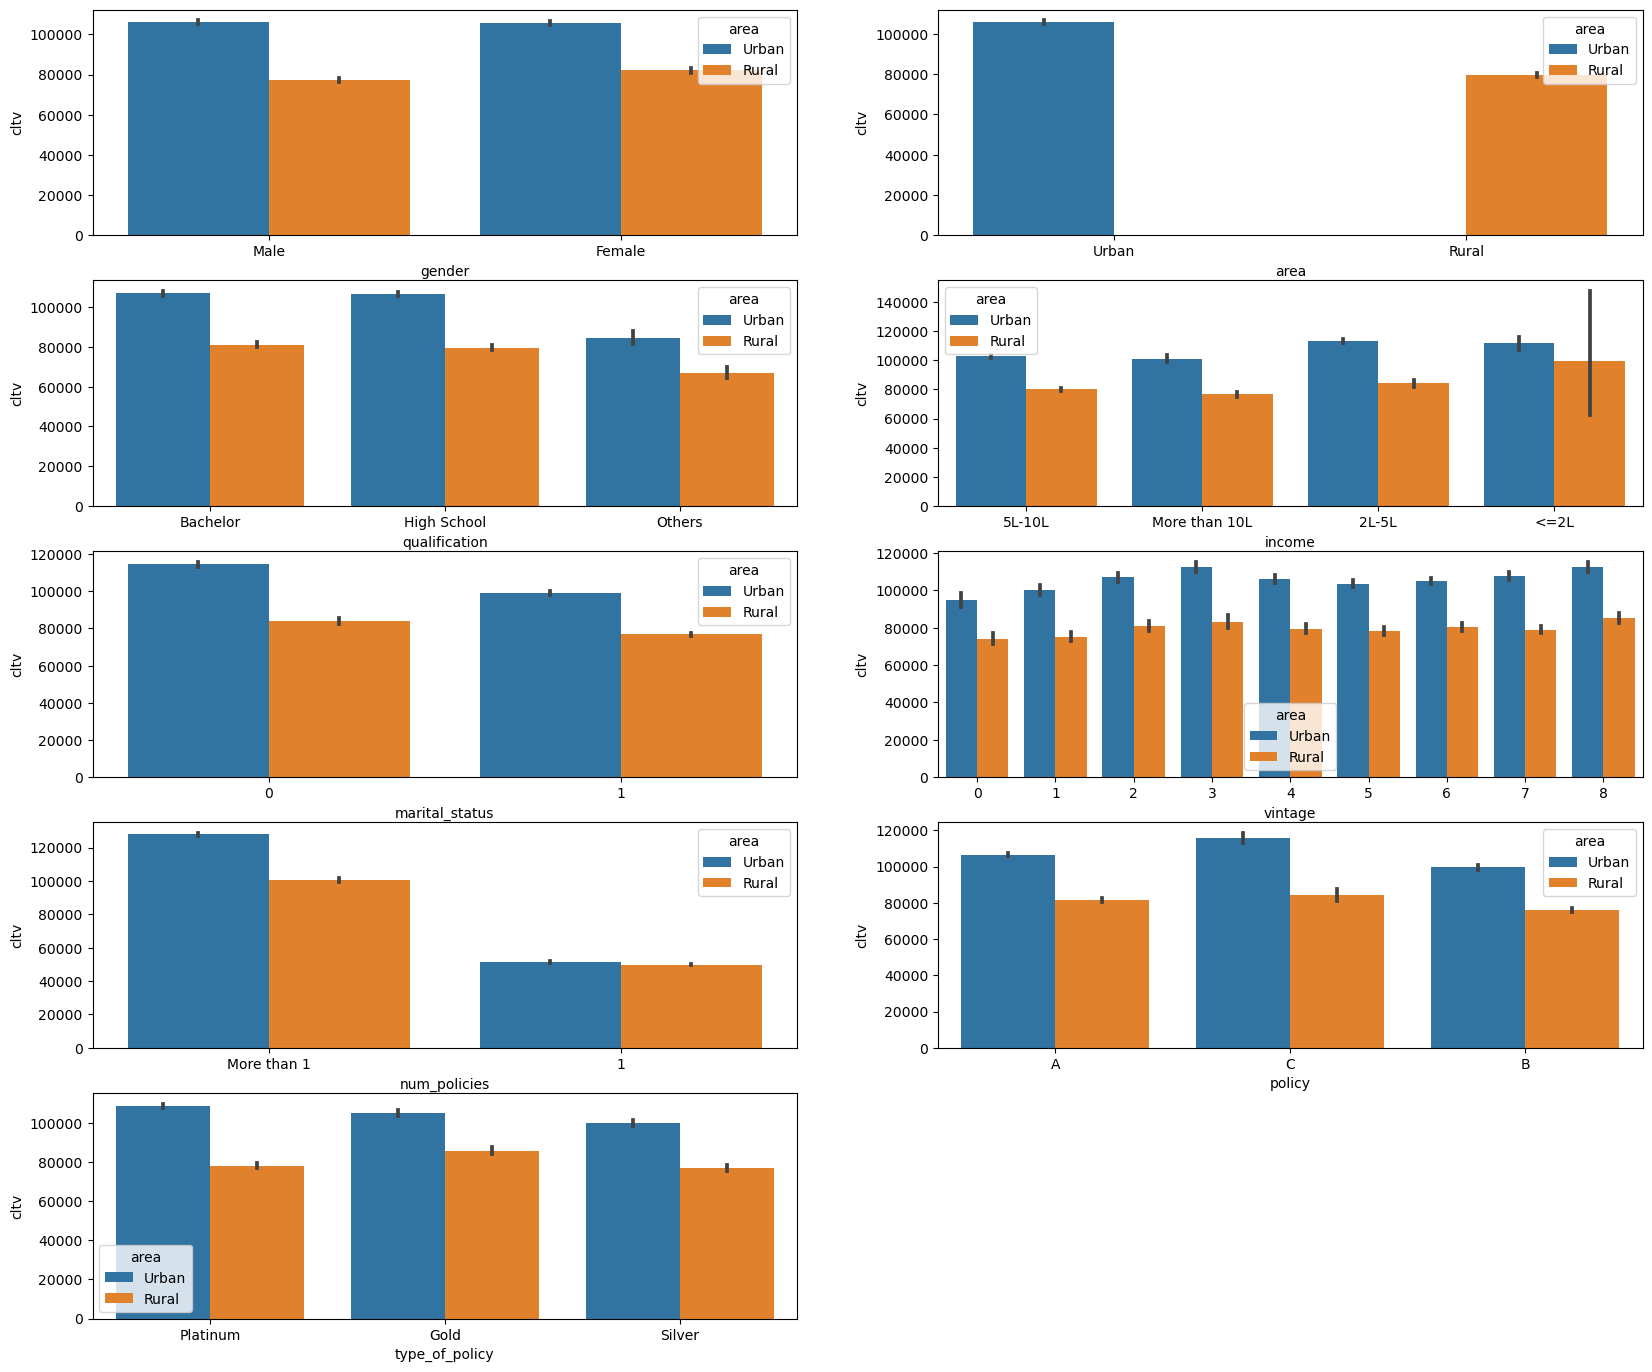

In [367]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['area'])
        c=c+1

In [368]:
#  While stuying the realtion of cltv with different feature by diving them in the groups of rural and urban area
# urban clients showing high cltv as compare to the rural clients.
# With vintage 3 years showing higher cltv

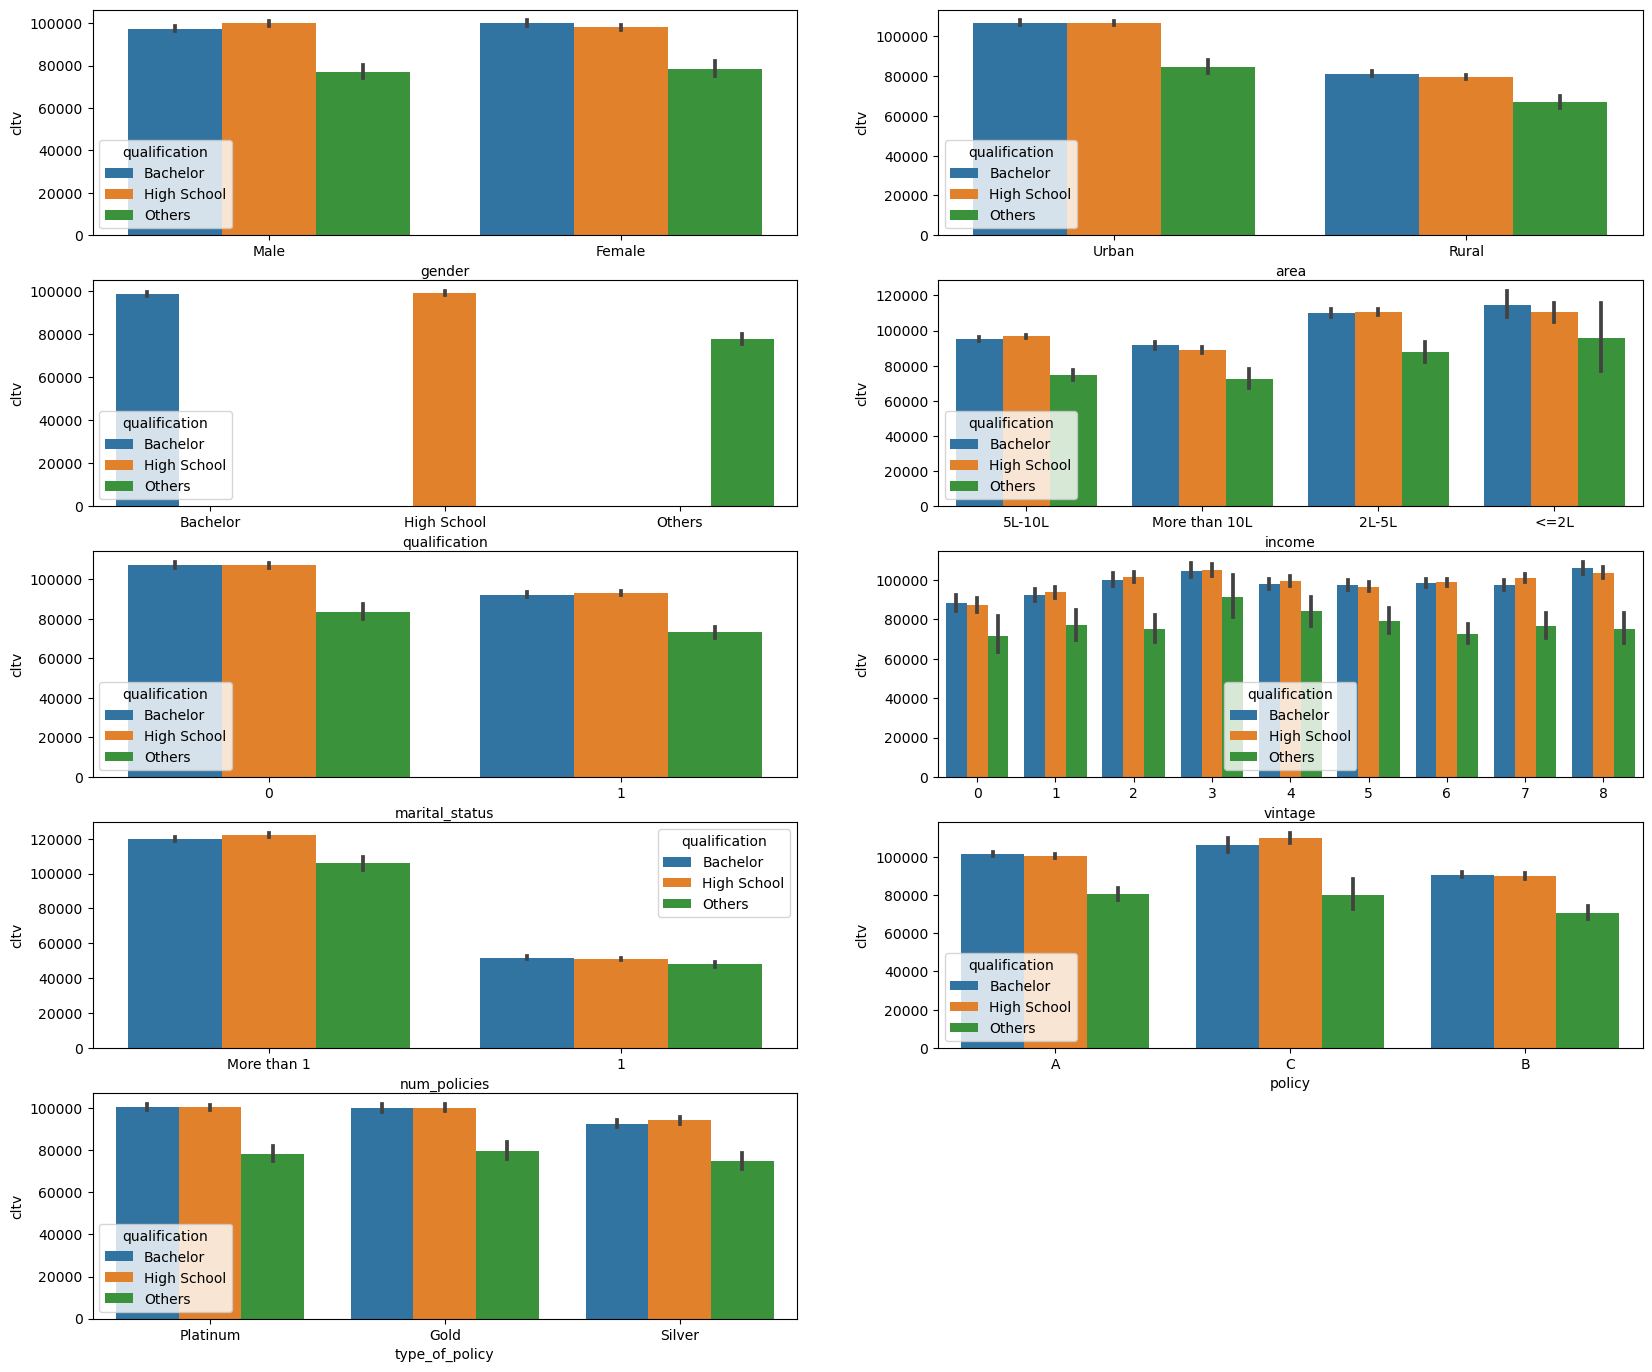

In [369]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['qualification'])
        c=c+1

In [370]:
# By understanding the clients educational we have understood that clients with bachelors and high school degrees
# understands the business more precisely averaging in cltv more. 

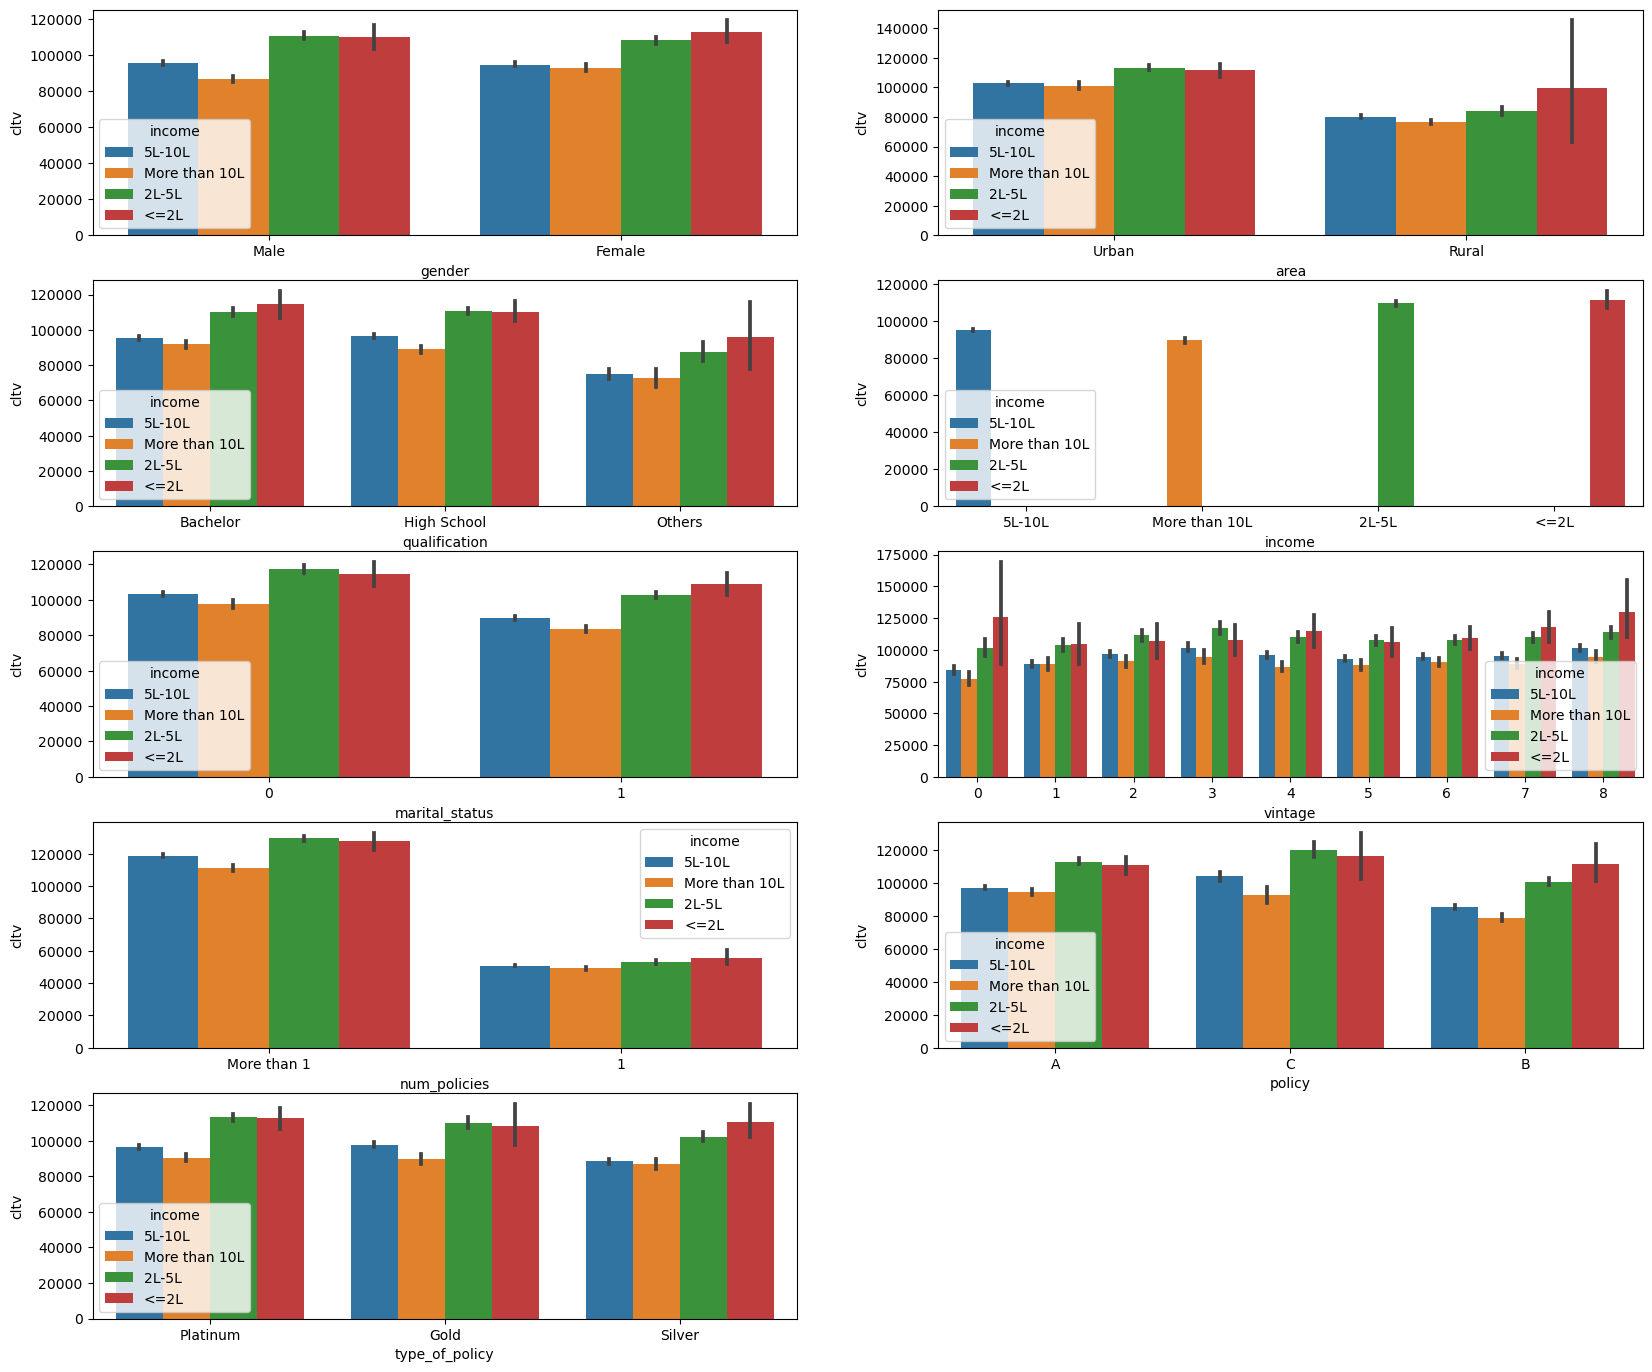

In [371]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['income'])
        c=c+1

In [372]:
# clients with 2-5L earning history are major contributers of major cltv 

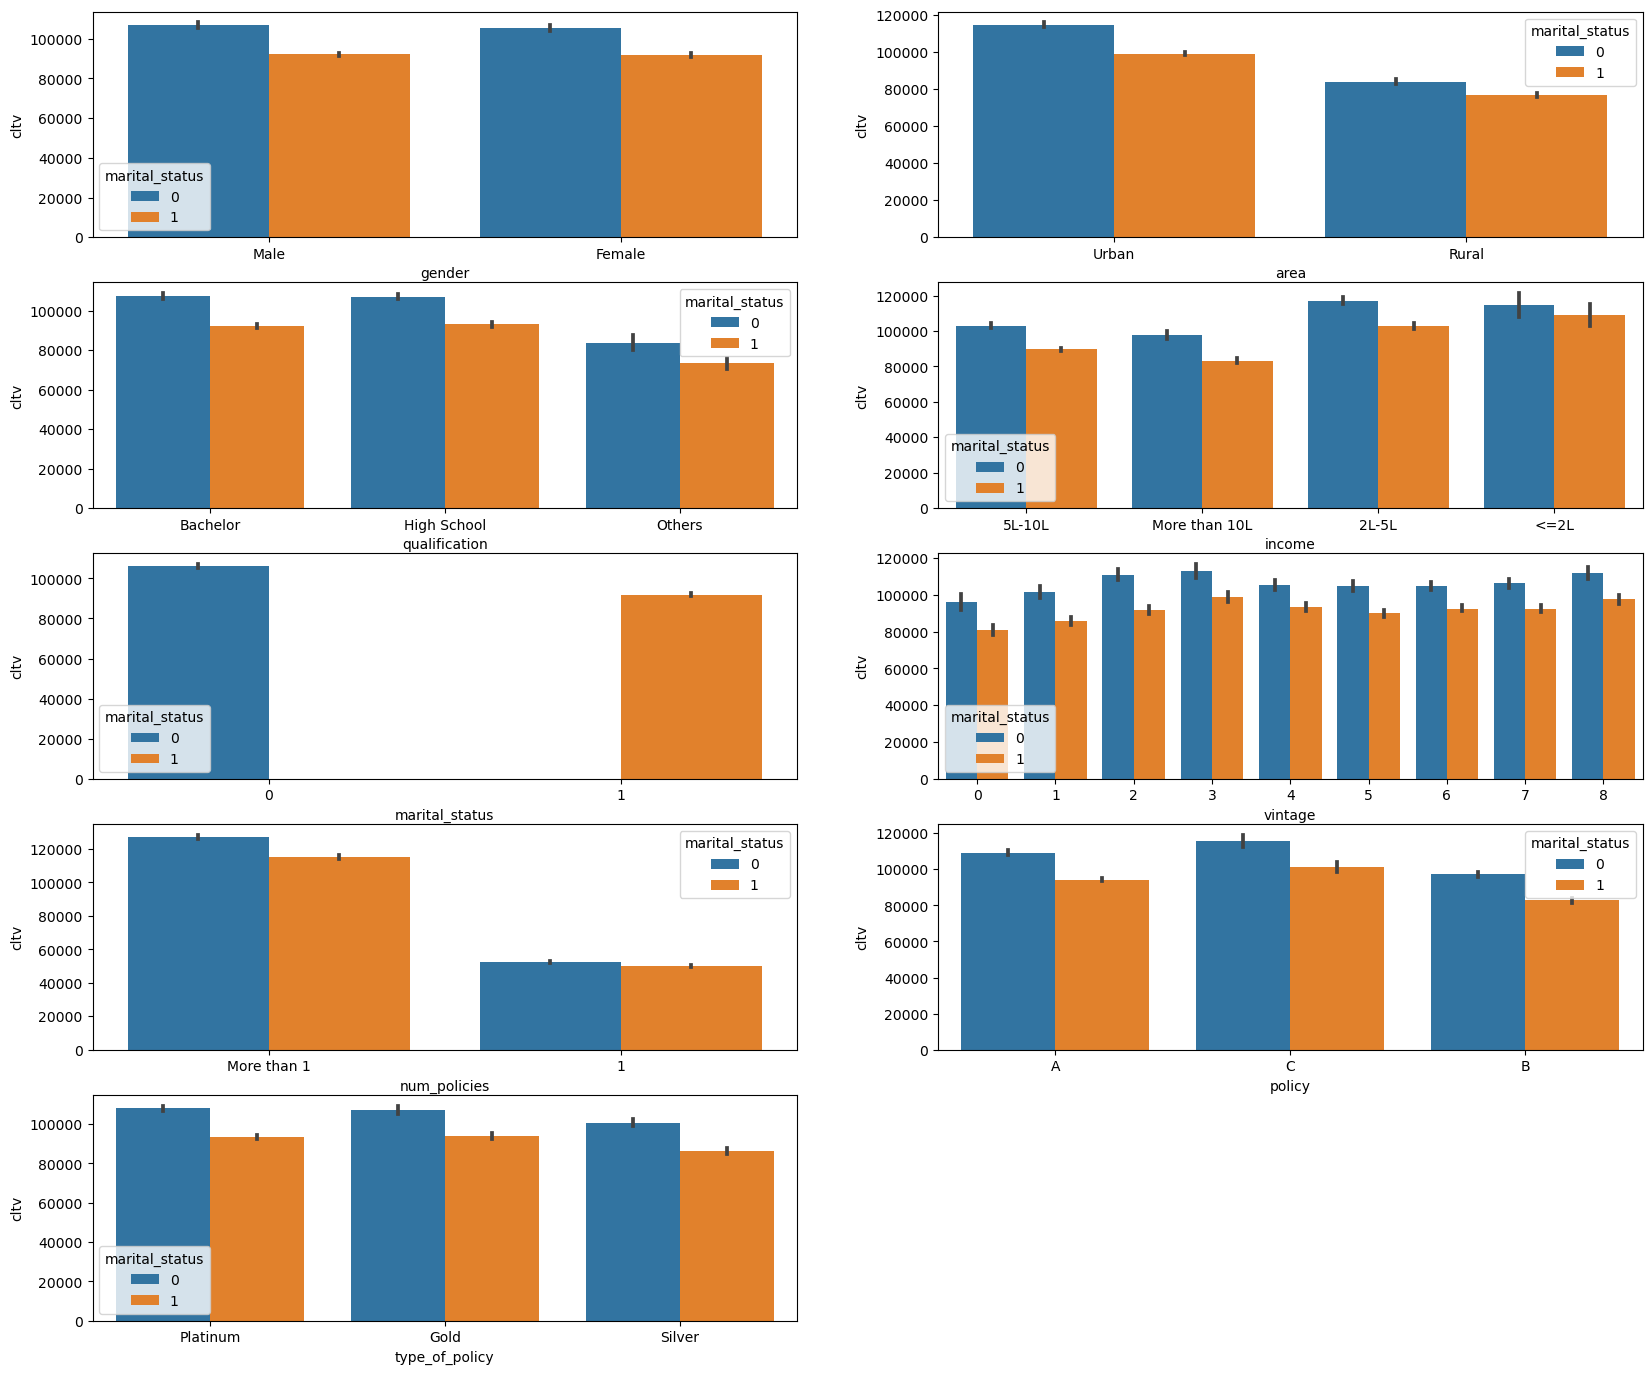

In [373]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['marital_status'])
        c=c+1

In [374]:
# Bachelor group is much more tagetable group for the bussiness as contributing in high attaining high cltv.

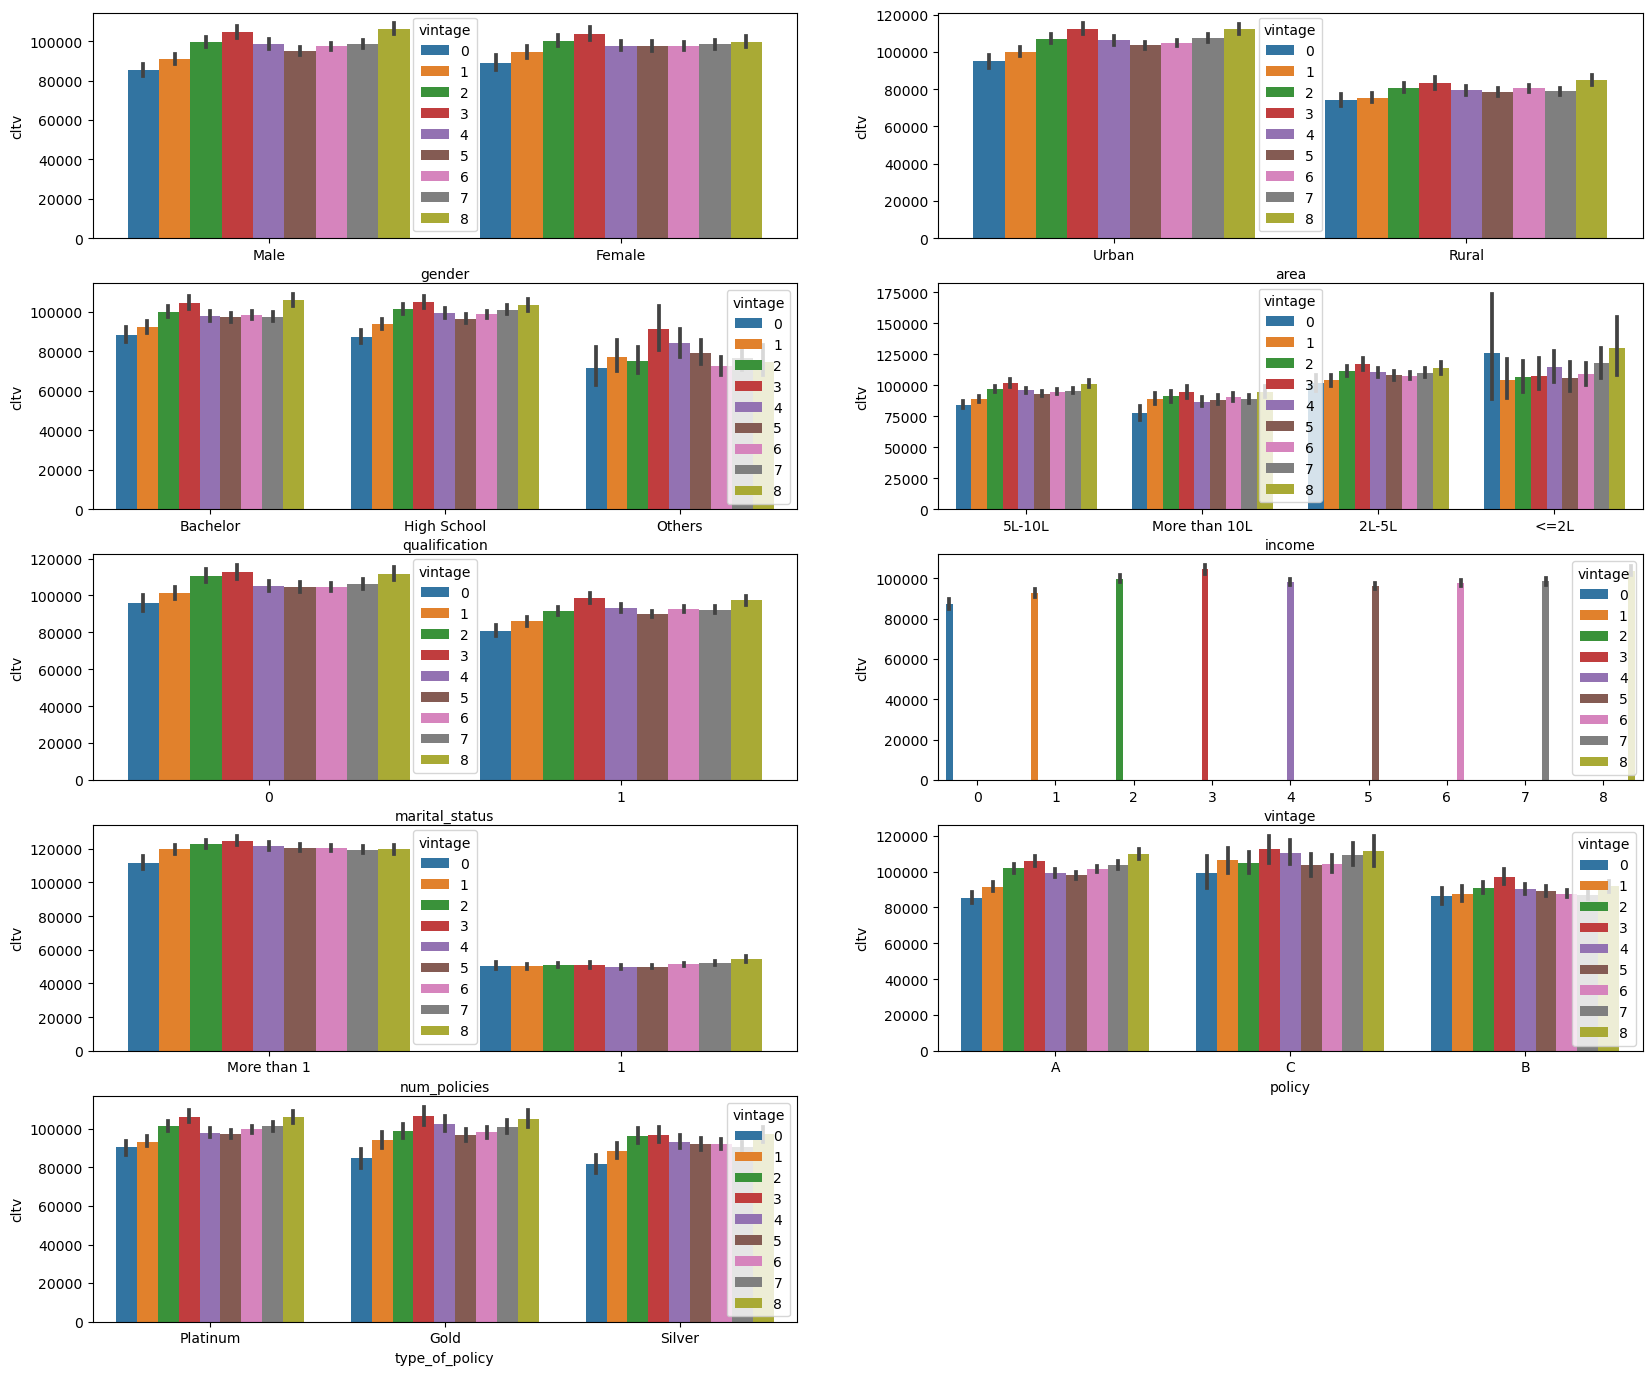

In [375]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['vintage'])
        c=c+1

In [376]:
# 3 years is the markable of high attaining high cltv 
# with small drop in the years 4-5, there is also slight increase in the cltv in 8 years.

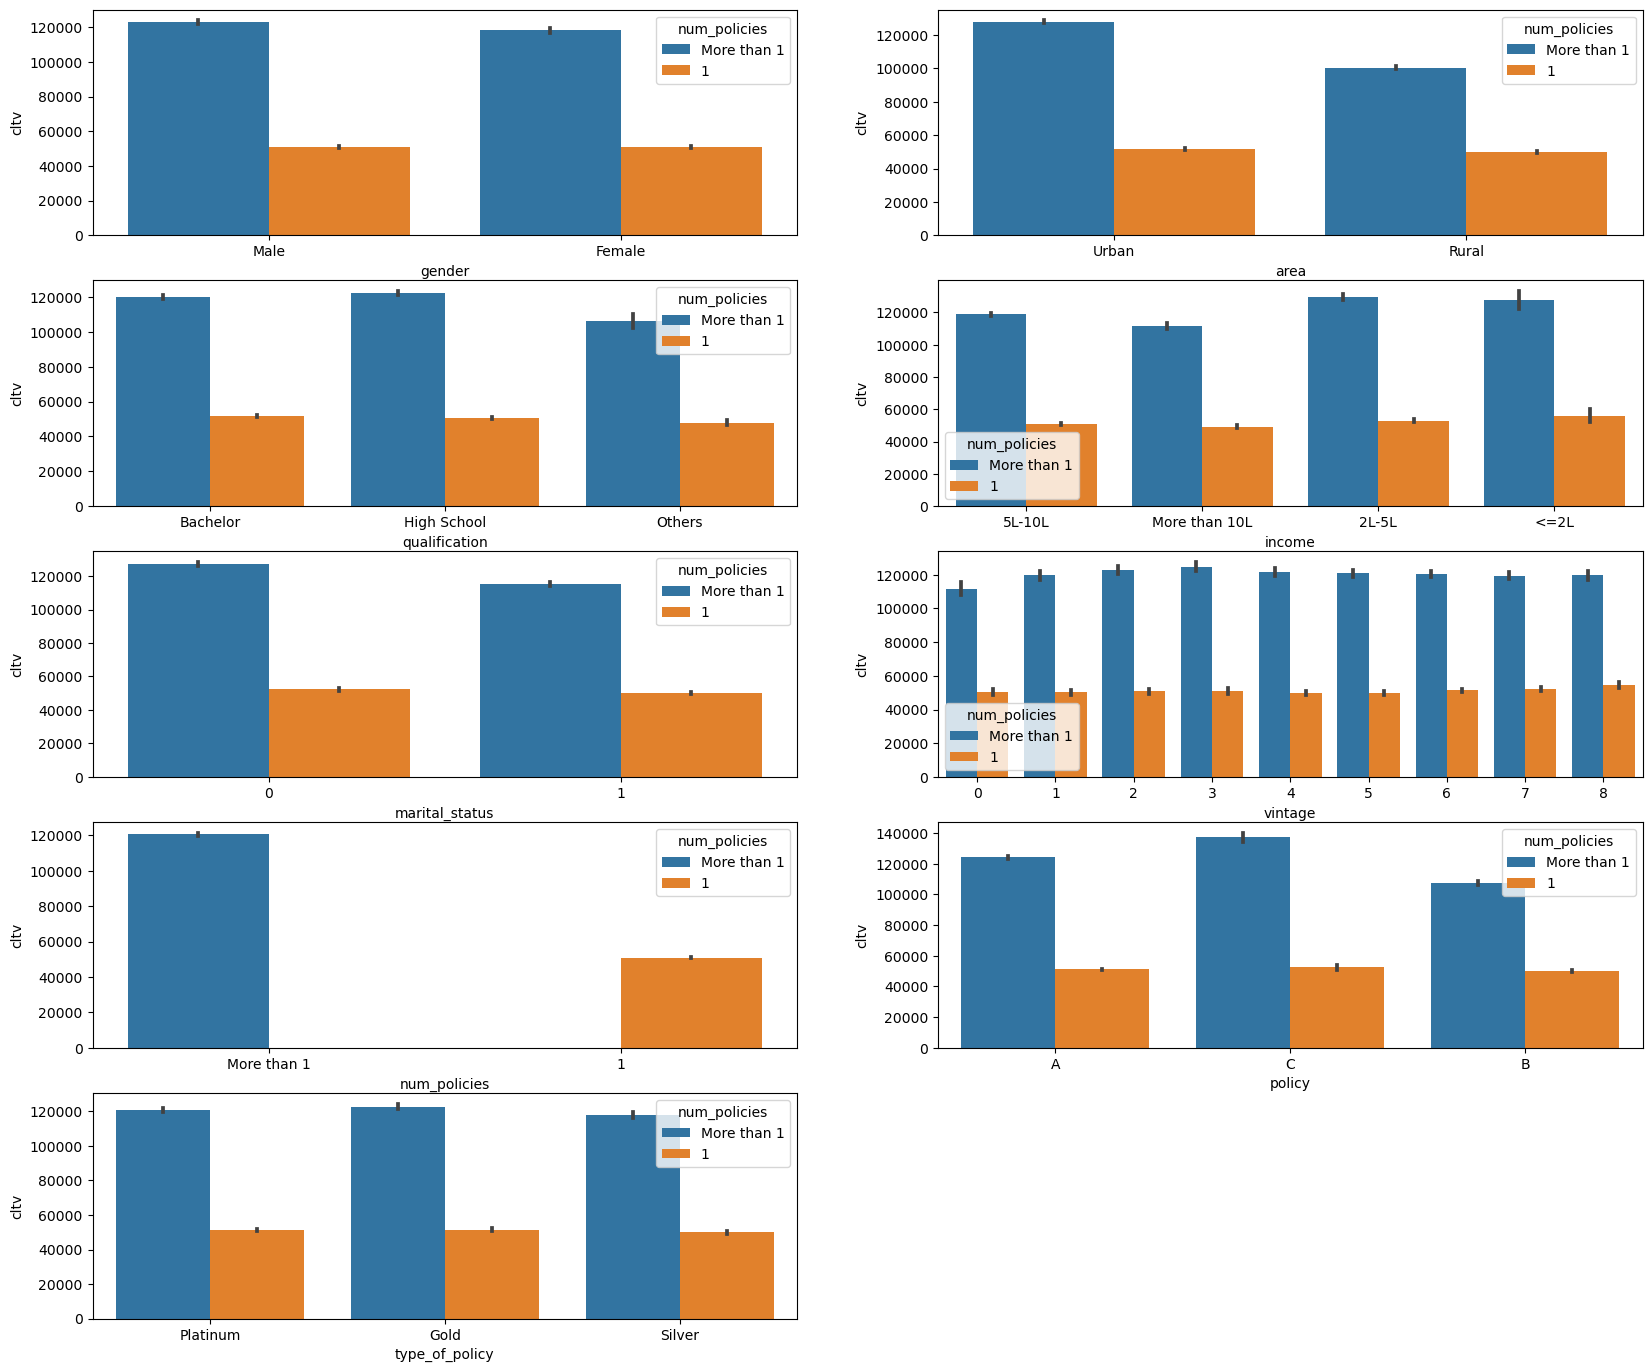

In [377]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['num_policies'])
        c=c+1

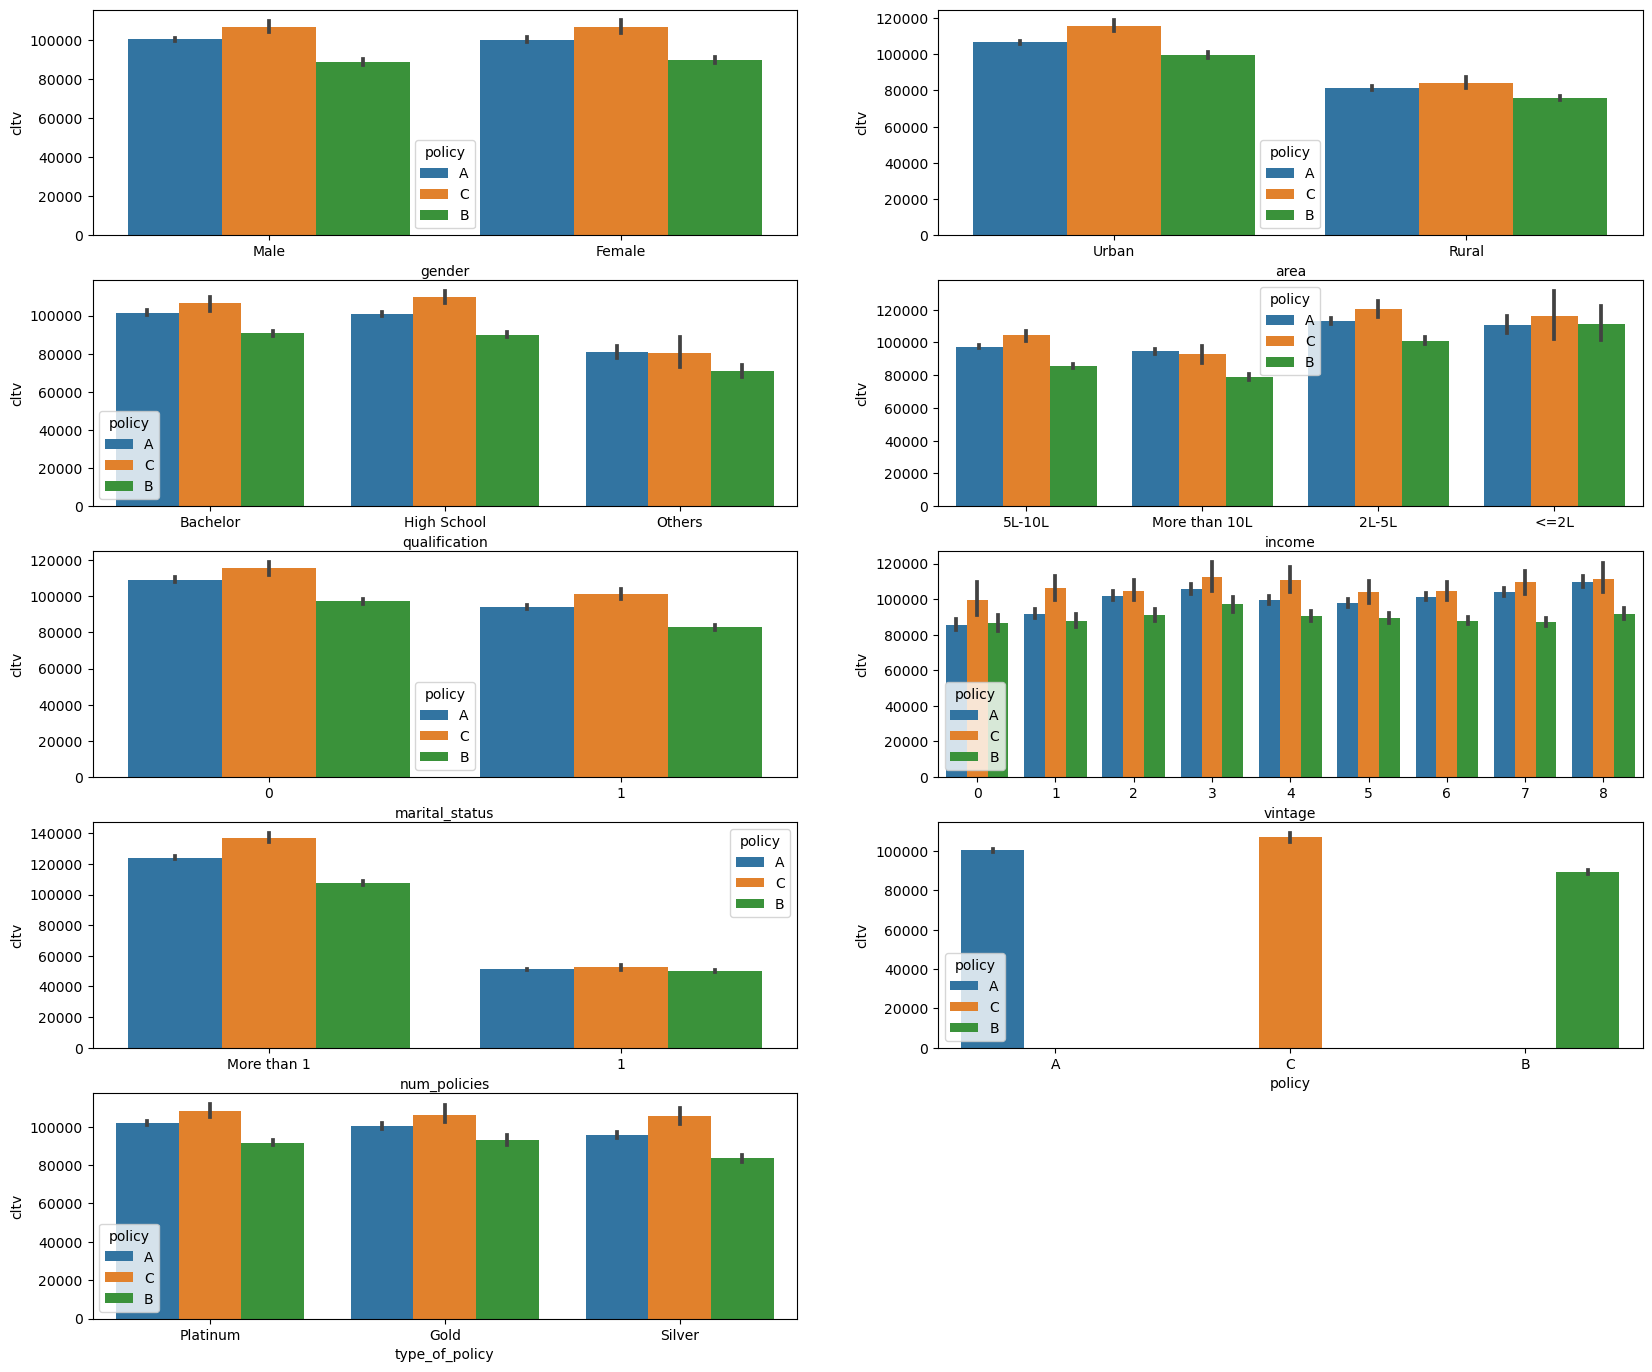

In [378]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['policy'])
        c=c+1

In [379]:
# On the basis of policy, policy C is the best product of the company giving high cltv to the company

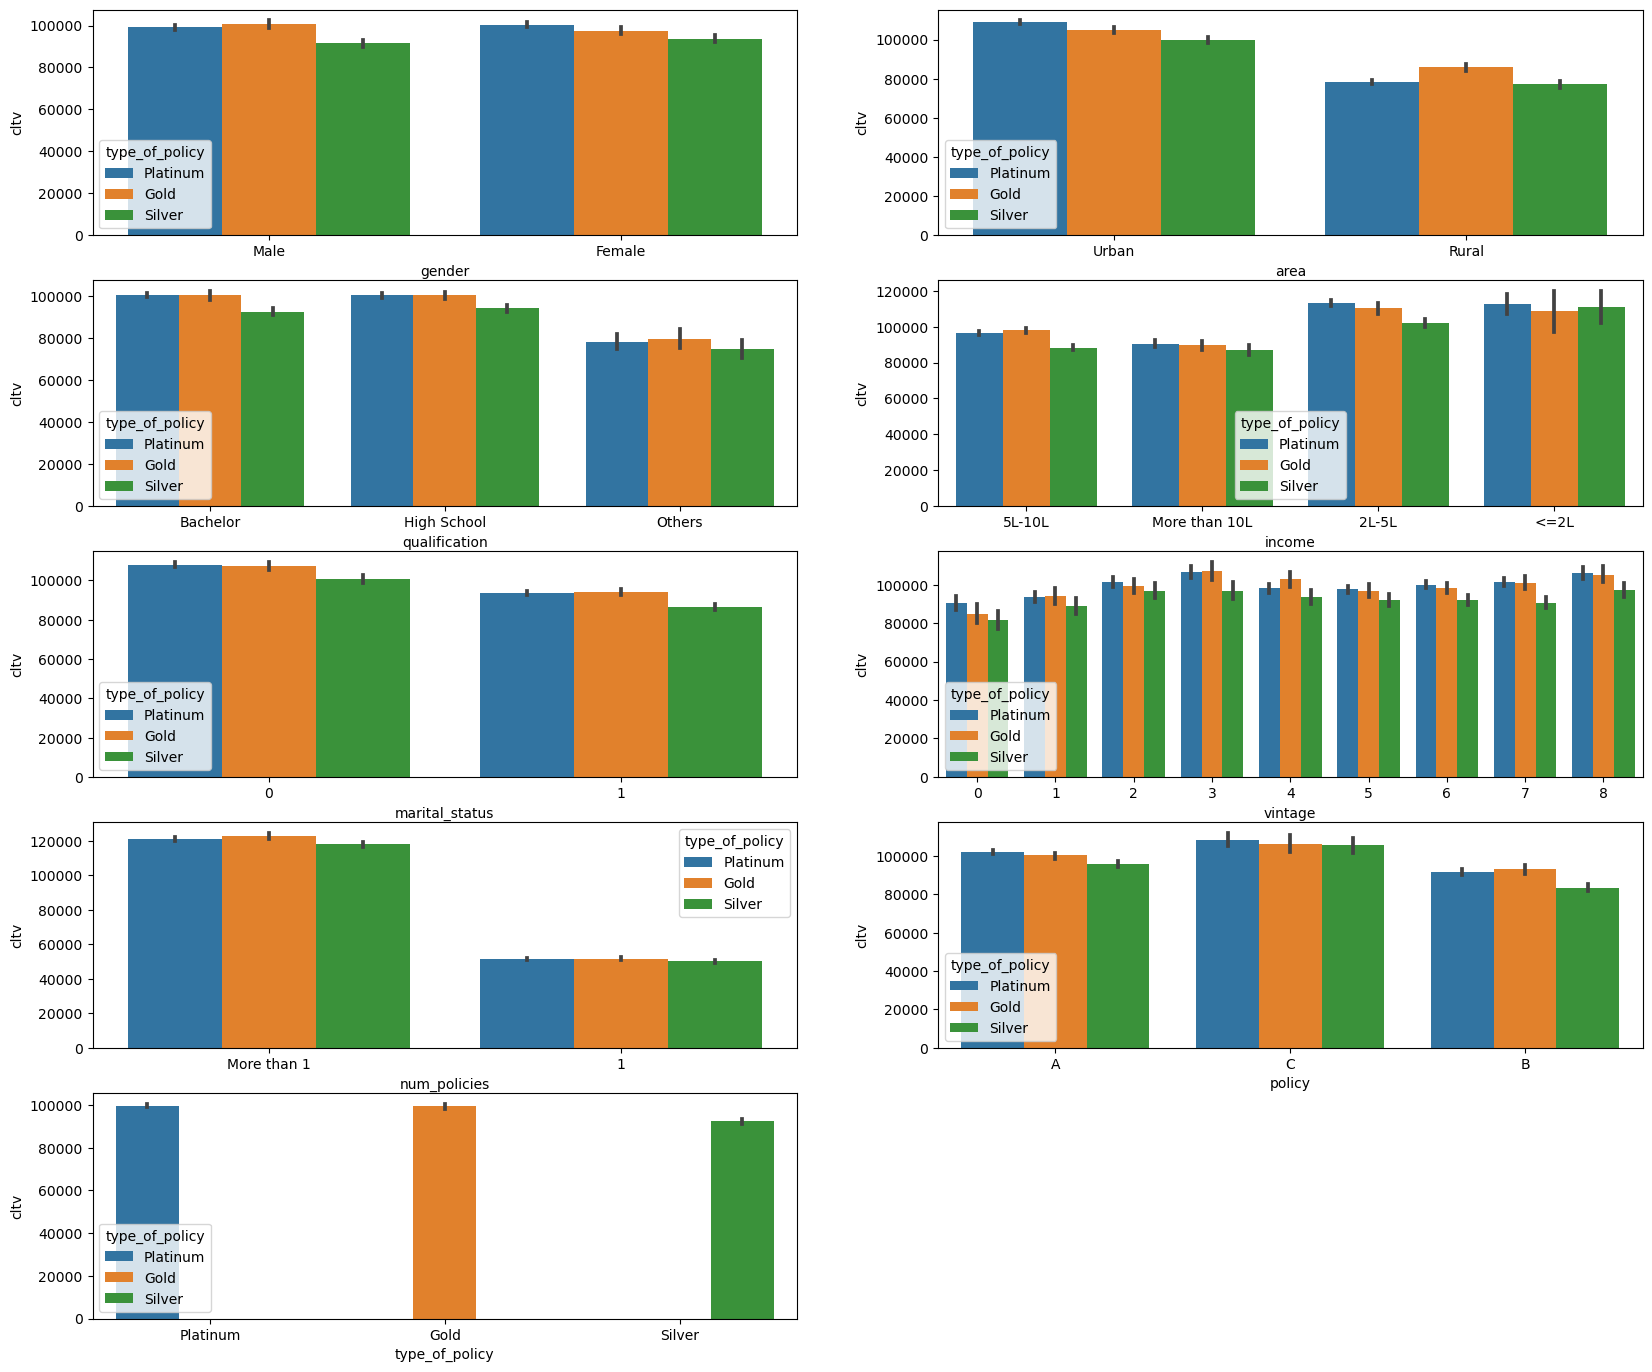

In [380]:
plt.figure(figsize=[20,17])
c=1
for i in cat_cols:
        plt.subplot(5,2,c)
        sns.barplot(x=train[i],y=train['cltv'],hue= train['type_of_policy'])
        c=c+1

In [381]:
# in urban area platinum is much more popular while in rural areas gold is much more popular
# in overall ratio platinum and gold type of policies are highly contributing in cltv
# inspite of the 2times less count of people buying gold as compare to platinum , it is giving high cltv 
# Gold policy is a profitable policy in the bussiness

In [382]:
# Boxplot of numerical data to study about the outliers

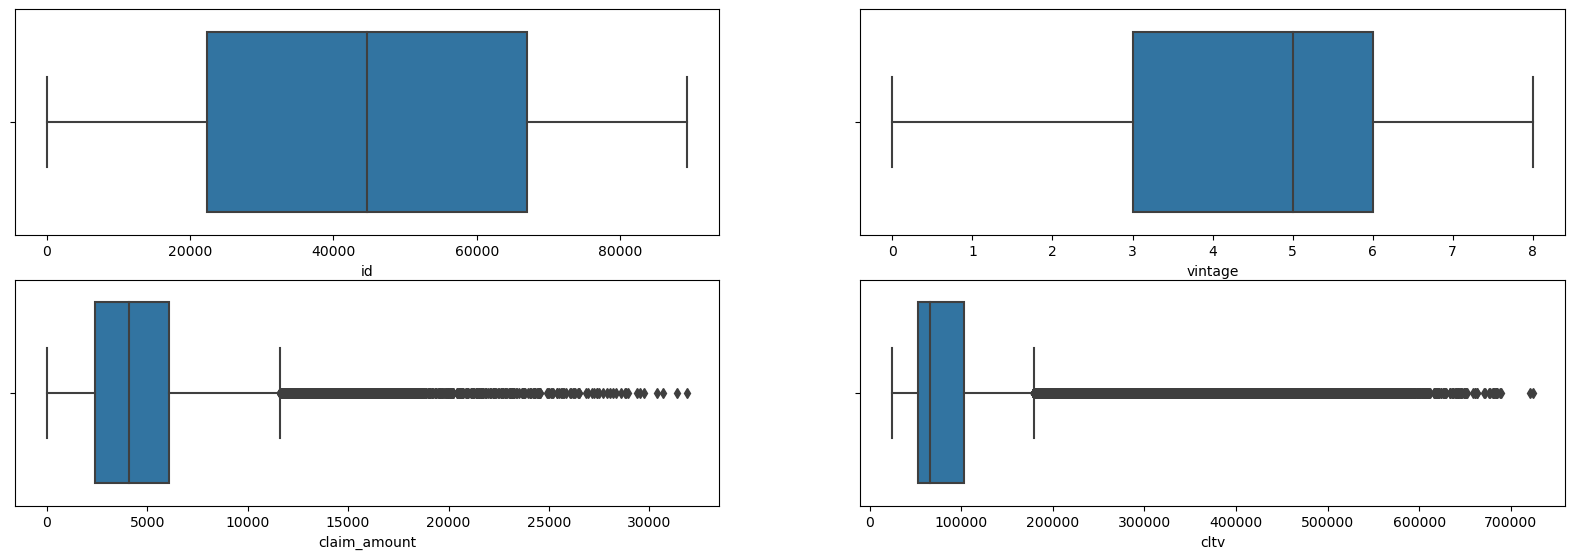

In [383]:
plt.figure(figsize=[20,17])
c=1
for i in num_cols:
    plt.subplot(5,2,c)
    sns.boxplot(train[i])
    c=c+1

In [384]:
# Correaltion analysis

<AxesSubplot:>

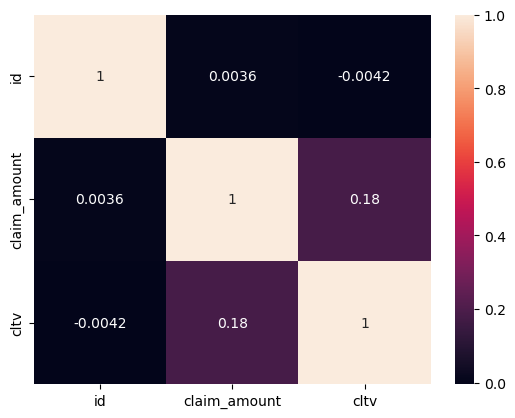

In [385]:
sns.heatmap(train.corr(),annot=True)

In [386]:
train

id  gender   area qualification         income marital_status  \
0          1    Male  Urban      Bachelor         5L-10L              1   
1          2    Male  Rural   High School         5L-10L              0   
2          3    Male  Urban      Bachelor         5L-10L              1   
3          4  Female  Rural   High School         5L-10L              0   
4          5    Male  Urban   High School  More than 10L              1   
...      ...     ...    ...           ...            ...            ...   
89387  89388    Male  Rural   High School  More than 10L              0   
89388  89389    Male  Urban      Bachelor         5L-10L              1   
89389  89390  Female  Urban      Bachelor         5L-10L              0   
89390  89391  Female  Rural   High School          2L-5L              0   
89391  89392  Female  Rural   High School         5L-10L              0   

      vintage  claim_amount num_policies policy type_of_policy    cltv  
0           5          5790  More than 1      A       Platinum   64308  
1           8          5080  More than 1      A       Platinum  515400  
2           8          2599  More than 1      A       Platinum   64212  
3           7             0  More than 1      A       Platinum   97920  
4           6          3508  More than 1      A           Gold   59736  
...       ...           ...          ...    ...            ...     ...  
89387       6             0  More than 1      B       Platinum   95736  
89388       0          3897  More than 1      A       Platinum   67596  
89389       4          3363  More than 1      B       Platinum  114120  
89390       8             0  More than 1      B       Platinum   71772  
89391       6             0  More than 1      B           Gold  108144  

[89392 rows x 12 columns]

In [387]:
train['vintage']=train['vintage'].astype(object)

In [388]:
val=train['vintage'].value_counts(normalize=True).to_dict()
val

{6: 0.19877617683909074,
 7: 0.14648961875783068,
 5: 0.1396209951673528,
 4: 0.11713576158940397,
 2: 0.1025259531054233,
 1: 0.08581304814748524,
 8: 0.08528727402899589,
 3: 0.07925765169142653,
 0: 0.04509352067299087}

In [389]:
scaled=train.copy()

In [390]:
scaled.drop(['id','cltv'],axis=1,inplace=True)

In [391]:
scaled

gender   area qualification         income marital_status vintage  \
0        Male  Urban      Bachelor         5L-10L              1       5   
1        Male  Rural   High School         5L-10L              0       8   
2        Male  Urban      Bachelor         5L-10L              1       8   
3      Female  Rural   High School         5L-10L              0       7   
4        Male  Urban   High School  More than 10L              1       6   
...       ...    ...           ...            ...            ...     ...   
89387    Male  Rural   High School  More than 10L              0       6   
89388    Male  Urban      Bachelor         5L-10L              1       0   
89389  Female  Urban      Bachelor         5L-10L              0       4   
89390  Female  Rural   High School          2L-5L              0       8   
89391  Female  Rural   High School         5L-10L              0       6   

       claim_amount num_policies policy type_of_policy  
0              5790  More than 1      A       Platinum  
1              5080  More than 1      A       Platinum  
2              2599  More than 1      A       Platinum  
3                 0  More than 1      A       Platinum  
4              3508  More than 1      A           Gold  
...             ...          ...    ...            ...  
89387             0  More than 1      B       Platinum  
89388          3897  More than 1      A       Platinum  
89389          3363  More than 1      B       Platinum  
89390             0  More than 1      B       Platinum  
89391             0  More than 1      B           Gold  

[89392 rows x 10 columns]

In [392]:
scaled['vintage']=scaled['vintage'].map(val)

In [393]:
scaled

gender   area qualification         income marital_status   vintage  \
0        Male  Urban      Bachelor         5L-10L              1  0.139621   
1        Male  Rural   High School         5L-10L              0  0.085287   
2        Male  Urban      Bachelor         5L-10L              1  0.085287   
3      Female  Rural   High School         5L-10L              0  0.146490   
4        Male  Urban   High School  More than 10L              1  0.198776   
...       ...    ...           ...            ...            ...       ...   
89387    Male  Rural   High School  More than 10L              0  0.198776   
89388    Male  Urban      Bachelor         5L-10L              1  0.045094   
89389  Female  Urban      Bachelor         5L-10L              0  0.117136   
89390  Female  Rural   High School          2L-5L              0  0.085287   
89391  Female  Rural   High School         5L-10L              0  0.198776   

       claim_amount num_policies policy type_of_policy  
0              5790  More than 1      A       Platinum  
1              5080  More than 1      A       Platinum  
2              2599  More than 1      A       Platinum  
3                 0  More than 1      A       Platinum  
4              3508  More than 1      A           Gold  
...             ...          ...    ...            ...  
89387             0  More than 1      B       Platinum  
89388          3897  More than 1      A       Platinum  
89389          3363  More than 1      B       Platinum  
89390             0  More than 1      B       Platinum  
89391             0  More than 1      B           Gold  

[89392 rows x 10 columns]

In [394]:
scaled.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy'],
      dtype='object')

In [395]:
for i in ['gender', 'area', 'marital_status','num_policies']:
    scaled[i]=pd.get_dummies(scaled[i], drop_first=True)

In [396]:
scaled

gender  area qualification         income  marital_status   vintage  \
0           1     1      Bachelor         5L-10L               1  0.139621   
1           1     0   High School         5L-10L               0  0.085287   
2           1     1      Bachelor         5L-10L               1  0.085287   
3           0     0   High School         5L-10L               0  0.146490   
4           1     1   High School  More than 10L               1  0.198776   
...       ...   ...           ...            ...             ...       ...   
89387       1     0   High School  More than 10L               0  0.198776   
89388       1     1      Bachelor         5L-10L               1  0.045094   
89389       0     1      Bachelor         5L-10L               0  0.117136   
89390       0     0   High School          2L-5L               0  0.085287   
89391       0     0   High School         5L-10L               0  0.198776   

       claim_amount  num_policies policy type_of_policy  
0              5790             1      A       Platinum  
1              5080             1      A       Platinum  
2              2599             1      A       Platinum  
3                 0             1      A       Platinum  
4              3508             1      A           Gold  
...             ...           ...    ...            ...  
89387             0             1      B       Platinum  
89388          3897             1      A       Platinum  
89389          3363             1      B       Platinum  
89390             0             1      B       Platinum  
89391             0             1      B           Gold  

[89392 rows x 10 columns]

In [397]:
scaled_2=pd.get_dummies(scaled, drop_first=True)

In [398]:
scaled_2

gender  area  marital_status   vintage  claim_amount  num_policies  \
0           1     1               1  0.139621          5790             1   
1           1     0               0  0.085287          5080             1   
2           1     1               1  0.085287          2599             1   
3           0     0               0  0.146490             0             1   
4           1     1               1  0.198776          3508             1   
...       ...   ...             ...       ...           ...           ...   
89387       1     0               0  0.198776             0             1   
89388       1     1               1  0.045094          3897             1   
89389       0     1               0  0.117136          3363             1   
89390       0     0               0  0.085287             0             1   
89391       0     0               0  0.198776             0             1   

       qualification_High School  qualification_Others  income_5L-10L  \
0                              0                     0              1   
1                              1                     0              1   
2                              0                     0              1   
3                              1                     0              1   
4                              1                     0              0   
...                          ...                   ...            ...   
89387                          1                     0              0   
89388                          0                     0              1   
89389                          0                     0              1   
89390                          1                     0              0   
89391                          1                     0              1   

       income_<=2L  income_More than 10L  policy_B  policy_C  \
0                0                     0         0         0   
1                0                     0         0         0   
2                0                     0         0         0   
3                0                     0         0         0   
4                0                     1         0         0   
...            ...                   ...       ...       ...   
89387            0                     1         1         0   
89388            0                     0         0         0   
89389            0                     0         1         0   
89390            0                     0         1         0   
89391            0                     0         1         0   

       type_of_policy_Platinum  type_of_policy_Silver  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            0                      0  
...                        ...                    ...  
89387                        1                      0  
89388                        1                      0  
89389                        1                      0  
89390                        1                      0  
89391                        0                      0  

[89392 rows x 15 columns]

In [399]:
# for i in['qualification', 'income', 'policy', 'type_of_policy']:
#     val2= scaled[i].value_counts(normalize=True).to_dict()
# print(val2)

In [400]:
# scaled['type_of_policy']=scaled['type_of_policy'].map(val2)

In [401]:
# val3=scaled['policy'].value_counts(normalize=True).to_dict()
# scaled['policy']=scaled['policy'].map(val3)
# val4=scaled['qualification'].value_counts(normalize=True).to_dict()
# scaled['qualification']=scaled['qualification'].map(val4)
# val5=scaled['income'].value_counts(normalize=True).to_dict()
# scaled['income']=scaled['income'].map(val5)

In [402]:
scaled_2

gender  area  marital_status   vintage  claim_amount  num_policies  \
0           1     1               1  0.139621          5790             1   
1           1     0               0  0.085287          5080             1   
2           1     1               1  0.085287          2599             1   
3           0     0               0  0.146490             0             1   
4           1     1               1  0.198776          3508             1   
...       ...   ...             ...       ...           ...           ...   
89387       1     0               0  0.198776             0             1   
89388       1     1               1  0.045094          3897             1   
89389       0     1               0  0.117136          3363             1   
89390       0     0               0  0.085287             0             1   
89391       0     0               0  0.198776             0             1   

       qualification_High School  qualification_Others  income_5L-10L  \
0                              0                     0              1   
1                              1                     0              1   
2                              0                     0              1   
3                              1                     0              1   
4                              1                     0              0   
...                          ...                   ...            ...   
89387                          1                     0              0   
89388                          0                     0              1   
89389                          0                     0              1   
89390                          1                     0              0   
89391                          1                     0              1   

       income_<=2L  income_More than 10L  policy_B  policy_C  \
0                0                     0         0         0   
1                0                     0         0         0   
2                0                     0         0         0   
3                0                     0         0         0   
4                0                     1         0         0   
...            ...                   ...       ...       ...   
89387            0                     1         1         0   
89388            0                     0         0         0   
89389            0                     0         1         0   
89390            0                     0         1         0   
89391            0                     0         1         0   

       type_of_policy_Platinum  type_of_policy_Silver  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            0                      0  
...                        ...                    ...  
89387                        1                      0  
89388                        1                      0  
89389                        1                      0  
89390                        1                      0  
89391                        0                      0  

[89392 rows x 15 columns]

In [403]:
for i in;

SyntaxError: invalid syntax (3982252657.py, line 1)

In [ ]:
# scaled_2['claim_amount']=stats.yeojohnson(scaled['claim_amount'])[0]

In [ ]:
# sns.distplot(scaled['claim_amount'])

In [ ]:
# sc=StandardScaler()

In [ ]:
# scaled_2['claim_amount']=sc.fit_transform(pd.DataFrame(scaled_2.loc[:,'claim_amount']))

In [405]:
scaled_2

gender  area  marital_status   vintage  claim_amount  num_policies  \
0           1     1               1  0.139621          5790             1   
1           1     0               0  0.085287          5080             1   
2           1     1               1  0.085287          2599             1   
3           0     0               0  0.146490             0             1   
4           1     1               1  0.198776          3508             1   
...       ...   ...             ...       ...           ...           ...   
89387       1     0               0  0.198776             0             1   
89388       1     1               1  0.045094          3897             1   
89389       0     1               0  0.117136          3363             1   
89390       0     0               0  0.085287             0             1   
89391       0     0               0  0.198776             0             1   

       qualification_High School  qualification_Others  income_5L-10L  \
0                              0                     0              1   
1                              1                     0              1   
2                              0                     0              1   
3                              1                     0              1   
4                              1                     0              0   
...                          ...                   ...            ...   
89387                          1                     0              0   
89388                          0                     0              1   
89389                          0                     0              1   
89390                          1                     0              0   
89391                          1                     0              1   

       income_<=2L  income_More than 10L  policy_B  policy_C  \
0                0                     0         0         0   
1                0                     0         0         0   
2                0                     0         0         0   
3                0                     0         0         0   
4                0                     1         0         0   
...            ...                   ...       ...       ...   
89387            0                     1         1         0   
89388            0                     0         0         0   
89389            0                     0         1         0   
89390            0                     0         1         0   
89391            0                     0         1         0   

       type_of_policy_Platinum  type_of_policy_Silver  
0                            1                      0  
1                            1                      0  
2                            1                      0  
3                            1                      0  
4                            0                      0  
...                        ...                    ...  
89387                        1                      0  
89388                        1                      0  
89389                        1                      0  
89390                        1                      0  
89391                        0                      0  

[89392 rows x 15 columns]

In [406]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Linear Regression

In [407]:
from sklearn.linear_model import LinearRegression 

In [408]:
lr=LinearRegression()

In [409]:
model=lr.fit(x_train,y_train)
pred_train=model.fit(x_train,y_train).predict(x_train)
pred=model.fit(x_train,y_train).predict(x_test)

In [410]:
#  RMSE on train and validation set
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.15504677170841996
Train RMSE:  83519.38177347492
Test RMSE:  83096.04961557426


# Decision Tree

In [411]:
dtree = DecisionTreeRegressor()

# Model Building
pred_train = dtree.fit(x_train, y_train).predict(x_train) # calc the Train RMSE
pred = dtree.fit(x_train, y_train).predict(x_test)

# RMSE on train and validation set

r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  -0.7658397247524327
Train RMSE:  21497.722623238482
Test RMSE:  120126.73808396238


# statsmodel

In [412]:
X_train=sma.add_constant(x_train)
X_test=sma.add_constant(x_test)
model=sma.OLS(y_train,X_train).fit()
model.summary()
pred=model.predict(X_test)

In [413]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.15504677170842074
Train RMSE:  21497.722623238482
Test RMSE:  83096.04961557421


In [414]:
# train2=train.copy()

In [415]:
# train2.drop('id',axis=1,inplace=True)

In [416]:
# treatment of outliers
num_cols2=train2.select_dtypes(int)
# num_cols2

NameError: name 'train2' is not defined

In [ ]:
# sns.boxplot(train2['claim_amount'])

In [ ]:
train2.columns

In [ ]:
# q1,q3 = np.quantile(train2['claim_amount'],[0.25,0.75])
# iqr = q3-q1
# ul = q3+(1.5*iqr)
# ll = q1-(1.5*iqr)
# train2.loc[train2['claim_amount']>ul,i]=ul
# train2.loc[train2['claim_amount']<ll,i]=ll

In [ ]:
# from sklearn.feature_selection import RFE

# rfe = RFE(estimator = lr, n_features_to_select=6)
# rfe.fit(x, y)
# # rfe.ranking_

In [ ]:
# pd.Series(rfe.ranking_, index = x.columns).sort_values().index[:6]

In [ ]:
# x1=scaled[['gender', 'area', 'qualification', 'marital_status', 'claim_amount',
#        'num_policies']]
# y=train['cltv']


# catboost

In [417]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1)
model.fit(x_train, y_train)

0:	learn: 83814.1601395	total: 4.25ms	remaining: 4.25ms
1:	learn: 83627.9370307	total: 7.84ms	remaining: 0us


In [418]:
pred_train=model.fit(x_train,y_train).predict(x_train)
pred=model.fit(x_train,y_train).predict(x_test)

0:	learn: 83814.1601395	total: 3.74ms	remaining: 3.74ms
1:	learn: 83627.9370307	total: 9.07ms	remaining: 0us
0:	learn: 83814.1601395	total: 4.01ms	remaining: 4.01ms
1:	learn: 83627.9370307	total: 7.66ms	remaining: 0us


In [419]:
r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.15277891911076802
Train RMSE:  83627.93703074029
Test RMSE:  83207.48969622524


In [420]:
from sklearn.model_selection import GridSearchCV

In [464]:
param_grid = {
    'depth': [2, 4, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5]}

In [ ]:
# Hyperparameter tuning

In [465]:
random_search = RandomSearchCV(CatBoostRegressor(), param_grid, cv=5, scoring= "r2")

In [466]:
random_search.fit(x,y)

0:	learn: 90467.4585896	total: 4.93ms	remaining: 488ms
1:	learn: 90342.2834636	total: 11ms	remaining: 539ms
2:	learn: 90215.4864683	total: 16.1ms	remaining: 520ms
3:	learn: 90092.0858528	total: 21.4ms	remaining: 513ms
4:	learn: 89970.7578116	total: 26.6ms	remaining: 505ms
5:	learn: 89851.6911717	total: 32.6ms	remaining: 510ms
6:	learn: 89734.8466566	total: 37.6ms	remaining: 500ms
7:	learn: 89619.3052759	total: 45.1ms	remaining: 518ms
8:	learn: 89506.9295752	total: 51ms	remaining: 516ms
9:	learn: 89395.4752601	total: 55.4ms	remaining: 498ms
10:	learn: 89288.8831893	total: 60.5ms	remaining: 490ms
11:	learn: 89181.8512736	total: 66ms	remaining: 484ms
12:	learn: 89076.6594611	total: 71.7ms	remaining: 480ms
13:	learn: 88973.4576875	total: 77.1ms	remaining: 473ms
14:	learn: 88874.3251239	total: 82.7ms	remaining: 469ms
15:	learn: 88774.2803660	total: 88.9ms	remaining: 467ms
16:	learn: 88676.9071359	total: 93.8ms	remaining: 458ms
17:	learn: 88583.0374448	total: 98ms	remaining: 446ms
18:	learn:

KeyboardInterrupt: 

In [424]:
print(random_search.best_params_)

{'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [425]:
model=CatBoostRegressor(iterations=100 , depth= 4, l2_leaf_reg= 1, learning_rate = 0.1)

In [426]:
model.fit(x_train, y_train)
pred_train=model.fit(x_train,y_train).predict(x_train)
pred=model.fit(x_train,y_train).predict(x_test)

0:	learn: 89369.9349948	total: 6.43ms	remaining: 637ms
1:	learn: 88285.6844026	total: 13.4ms	remaining: 655ms
2:	learn: 87392.5802126	total: 20.4ms	remaining: 660ms
3:	learn: 86663.8038676	total: 28.1ms	remaining: 673ms
4:	learn: 86046.9202259	total: 33.4ms	remaining: 634ms
5:	learn: 85577.7177331	total: 40.7ms	remaining: 637ms
6:	learn: 85174.2847696	total: 47.1ms	remaining: 626ms
7:	learn: 84826.5250180	total: 52.6ms	remaining: 605ms
8:	learn: 84542.3337434	total: 58.1ms	remaining: 588ms
9:	learn: 84311.8476138	total: 63.6ms	remaining: 573ms
10:	learn: 84127.1144619	total: 69.1ms	remaining: 559ms
11:	learn: 83981.1464340	total: 75.4ms	remaining: 553ms
12:	learn: 83854.2685861	total: 80.6ms	remaining: 539ms
13:	learn: 83753.1073925	total: 87.4ms	remaining: 537ms
14:	learn: 83656.3562202	total: 92.6ms	remaining: 525ms
15:	learn: 83577.4835803	total: 97.9ms	remaining: 514ms
16:	learn: 83506.8186645	total: 104ms	remaining: 506ms
17:	learn: 83446.9337327	total: 109ms	remaining: 497ms
18:	

In [427]:
r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.1652168086500586
Train RMSE:  82967.95805962618
Test RMSE:  82594.45484911176


# XGboost

In [428]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [429]:
import xgboost as xgb

In [430]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, max_depth=4, learning_rate =0.1)

In [470]:
x_train.columns

Index(['gender', 'area', 'marital_status', 'vintage', 'claim_amount',
       'num_policies', 'qualification_High School', 'qualification_Others',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L', 'policy_B',
       'policy_C', 'type_of_policy_Platinum', 'type_of_policy_Silver'],
      dtype='object')

In [488]:
x_train.rename(columns = {'income_<=2L':'income_less_2L'}, inplace = True)
x_test.rename(columns = {'income_<=2L':'income_less_2L'}, inplace = True)
x.rename(columns = {'income_<=2L':'income_less_2L'}, inplace = True)

In [473]:
model=xgb_r.fit(x_train,y_train)

[22:21:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [476]:
pred_train=model.fit(x_train,y_train).predict(x_train)
pred=model.fit(x_train,y_train).predict(x_test)

[22:24:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:24:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [477]:
r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.16556549612392857
Train RMSE:  82463.62537358656
Test RMSE:  82577.20326802177


In [480]:
param_grid = {
    'depth': [2, 4, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimator': [100, 200, 300]}

In [499]:
xgbr = xgb.XGBRegressor()
random_search=RandomizedSearchCV(xgbr, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

[22:57:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "depth", "n_estimator" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                         

In [500]:
random_search.best_params_

{'n_estimator': 100, 'learning_rate': 0.1, 'depth': 2}

In [501]:
xgbr = xgb.XGBRegressor(n_estimator= 100, learning_rate= 0.1, depth= 2)

In [502]:
model=xgbr.fit(x_train,y_train)

[23:00:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "depth", "n_estimator" } are not used.



In [503]:
pred_train=model.fit(x_train,y_train).predict(x_train)
pred=model.fit(x_train,y_train).predict(x_test)

[23:01:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "depth", "n_estimator" } are not used.

[23:01:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "depth", "n_estimator" } are not used.



In [504]:
r2 = r2_score(y_test, pred)
print("R Squared: ", r2)

train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

R Squared:  0.16278357232897434
Train RMSE:  80917.40051514353
Test RMSE:  82714.74092686118


In [ ]:
pred=model.predict()

In [432]:
test=pd.read_csv(r"C:\Users\hp\Downloads\test_koRSKBP.csv")

In [433]:
test

id  gender   area qualification         income  marital_status  \
0       89393  Female  Rural   High School         5L-10L               0   
1       89394  Female  Urban   High School          2L-5L               0   
2       89395    Male  Rural   High School         5L-10L               1   
3       89396  Female  Rural      Bachelor  More than 10L               1   
4       89397  Female  Urban   High School          2L-5L               0   
...       ...     ...    ...           ...            ...             ...   
59590  148983    Male  Rural      Bachelor         5L-10L               1   
59591  148984    Male  Urban   High School         5L-10L               0   
59592  148985  Female  Urban   High School          2L-5L               1   
59593  148986    Male  Rural      Bachelor         5L-10L               0   
59594  148987  Female  Urban      Bachelor         5L-10L               1   

       vintage  claim_amount num_policies policy type_of_policy  
0            6          2134  More than 1      B         Silver  
1            4          4102  More than 1      A       Platinum  
2            7          2925  More than 1      B           Gold  
3            2             0  More than 1      B         Silver  
4            5         14059  More than 1      B         Silver  
...        ...           ...          ...    ...            ...  
59590        6             0            1      A         Silver  
59591        6             0            1      C           Gold  
59592        4          3323  More than 1      B       Platinum  
59593        1          2886  More than 1      A         Silver  
59594        4          5939  More than 1      B       Platinum  

[59595 rows x 11 columns]

In [434]:
test.drop('id',axis=1,inplace=True)

In [435]:
test

gender   area qualification         income  marital_status  vintage  \
0      Female  Rural   High School         5L-10L               0        6   
1      Female  Urban   High School          2L-5L               0        4   
2        Male  Rural   High School         5L-10L               1        7   
3      Female  Rural      Bachelor  More than 10L               1        2   
4      Female  Urban   High School          2L-5L               0        5   
...       ...    ...           ...            ...             ...      ...   
59590    Male  Rural      Bachelor         5L-10L               1        6   
59591    Male  Urban   High School         5L-10L               0        6   
59592  Female  Urban   High School          2L-5L               1        4   
59593    Male  Rural      Bachelor         5L-10L               0        1   
59594  Female  Urban      Bachelor         5L-10L               1        4   

       claim_amount num_policies policy type_of_policy  
0              2134  More than 1      B         Silver  
1              4102  More than 1      A       Platinum  
2              2925  More than 1      B           Gold  
3                 0  More than 1      B         Silver  
4             14059  More than 1      B         Silver  
...             ...          ...    ...            ...  
59590             0            1      A         Silver  
59591             0            1      C           Gold  
59592          3323  More than 1      B       Platinum  
59593          2886  More than 1      A         Silver  
59594          5939  More than 1      B       Platinum  

[59595 rows x 10 columns]

In [436]:
test['vintage']=test['vintage'].astype(object)

In [437]:
test

gender   area qualification         income  marital_status vintage  \
0      Female  Rural   High School         5L-10L               0       6   
1      Female  Urban   High School          2L-5L               0       4   
2        Male  Rural   High School         5L-10L               1       7   
3      Female  Rural      Bachelor  More than 10L               1       2   
4      Female  Urban   High School          2L-5L               0       5   
...       ...    ...           ...            ...             ...     ...   
59590    Male  Rural      Bachelor         5L-10L               1       6   
59591    Male  Urban   High School         5L-10L               0       6   
59592  Female  Urban   High School          2L-5L               1       4   
59593    Male  Rural      Bachelor         5L-10L               0       1   
59594  Female  Urban      Bachelor         5L-10L               1       4   

       claim_amount num_policies policy type_of_policy  
0              2134  More than 1      B         Silver  
1              4102  More than 1      A       Platinum  
2              2925  More than 1      B           Gold  
3                 0  More than 1      B         Silver  
4             14059  More than 1      B         Silver  
...             ...          ...    ...            ...  
59590             0            1      A         Silver  
59591             0            1      C           Gold  
59592          3323  More than 1      B       Platinum  
59593          2886  More than 1      A         Silver  
59594          5939  More than 1      B       Platinum  

[59595 rows x 10 columns]

In [438]:
val=test['vintage'].value_counts(normalize=True).to_dict()
val

{6: 0.19969796123835892,
 7: 0.14648879939592246,
 5: 0.13989428643342564,
 4: 0.11816427552647034,
 2: 0.1009816259753335,
 8: 0.08754090108230557,
 1: 0.0857286685124591,
 3: 0.07884889671952346,
 0: 0.04265458511620102}

In [439]:
test['vintage']=test['vintage'].map(val)

In [444]:
for i in ['gender', 'area', 'marital_status','num_policies']:
    test[i]=pd.get_dummies(test[i], drop_first=True)

In [446]:
test_dummy=pd.get_dummies(test, drop_first=True)

In [447]:
test_dummy

gender  area  marital_status   vintage  claim_amount  num_policies  \
0           0     0               0  0.199698          2134             1   
1           0     1               0  0.118164          4102             1   
2           1     0               1  0.146489          2925             1   
3           0     0               1  0.100982             0             1   
4           0     1               0  0.139894         14059             1   
...       ...   ...             ...       ...           ...           ...   
59590       1     0               1  0.199698             0             0   
59591       1     1               0  0.199698             0             0   
59592       0     1               1  0.118164          3323             1   
59593       1     0               0  0.085729          2886             1   
59594       0     1               1  0.118164          5939             1   

       qualification_High School  qualification_Others  income_5L-10L  \
0                              1                     0              1   
1                              1                     0              0   
2                              1                     0              1   
3                              0                     0              0   
4                              1                     0              0   
...                          ...                   ...            ...   
59590                          0                     0              1   
59591                          1                     0              1   
59592                          1                     0              0   
59593                          0                     0              1   
59594                          0                     0              1   

       income_<=2L  income_More than 10L  policy_B  policy_C  \
0                0                     0         1         0   
1                0                     0         0         0   
2                0                     0         1         0   
3                0                     1         1         0   
4                0                     0         1         0   
...            ...                   ...       ...       ...   
59590            0                     0         0         0   
59591            0                     0         0         1   
59592            0                     0         1         0   
59593            0                     0         0         0   
59594            0                     0         1         0   

       type_of_policy_Platinum  type_of_policy_Silver  
0                            0                      1  
1                            1                      0  
2                            0                      0  
3                            0                      1  
4                            0                      1  
...                        ...                    ...  
59590                        0                      1  
59591                        0                      0  
59592                        1                      0  
59593                        0                      1  
59594                        1                      0  

[59595 rows x 15 columns]

In [448]:
test_dummy.columns

Index(['gender', 'area', 'marital_status', 'vintage', 'claim_amount',
       'num_policies', 'qualification_High School', 'qualification_Others',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L', 'policy_B',
       'policy_C', 'type_of_policy_Platinum', 'type_of_policy_Silver'],
      dtype='object')

In [449]:
model=CatBoostRegressor(iterations=100 , depth= 4, l2_leaf_reg= 1, learning_rate = 0.1)

In [450]:
fit=model.fit(x,y)

0:	learn: 89311.8651786	total: 8.92ms	remaining: 883ms
1:	learn: 88221.9575928	total: 15.6ms	remaining: 762ms
2:	learn: 87323.8594594	total: 23.1ms	remaining: 746ms
3:	learn: 86592.0874108	total: 30.1ms	remaining: 721ms
4:	learn: 85975.4789579	total: 36.8ms	remaining: 699ms
5:	learn: 85479.0535949	total: 43.4ms	remaining: 680ms
6:	learn: 85074.3149340	total: 49.7ms	remaining: 661ms
7:	learn: 84729.6097278	total: 55.9ms	remaining: 642ms
8:	learn: 84441.7330292	total: 62.3ms	remaining: 630ms
9:	learn: 84212.9096217	total: 68.7ms	remaining: 619ms
10:	learn: 84030.9039063	total: 75.1ms	remaining: 608ms
11:	learn: 83882.4518464	total: 82.3ms	remaining: 603ms
12:	learn: 83744.8027795	total: 88.5ms	remaining: 592ms
13:	learn: 83638.1843696	total: 95.7ms	remaining: 588ms
14:	learn: 83544.7111160	total: 103ms	remaining: 583ms
15:	learn: 83465.4130879	total: 110ms	remaining: 578ms
16:	learn: 83400.3004714	total: 117ms	remaining: 570ms
17:	learn: 83347.2695234	total: 125ms	remaining: 569ms
18:	le

In [451]:
pred=fit.predict(test_dummy)

In [453]:
sample=pd.read_csv(r"C:\Users\hp\Downloads\sample_submission_9zqft7i\sample_submission.csv")

In [455]:
sample['cltv']=pred

In [456]:
sample

id           cltv
0       89393   93783.099160
1       89394  127915.538465
2       89395   93370.336784
3       89396   87623.576516
4       89397  131591.536291
...       ...            ...
59590  148983   48490.593481
59591  148984   53622.479447
59592  148985  104396.655997
59593  148986  108531.674728
59594  148987  114640.455176

[59595 rows x 2 columns]

In [459]:
sample.to_csv('sample_file.csv',index=False)

In [460]:
cd

C:\Users\hp


In [485]:
model2=xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, max_depth=4, learning_rate =0.1)

In [489]:
fit2=model2.fit(x,y)

[22:40:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [491]:
test_dummy.rename(columns = {'income_<=2L':'income_less_2L'}, inplace = True)

In [492]:
pred2=fit2.predict(test_dummy)

In [494]:
sample2=pd.read_csv(r"C:\Users\hp\Downloads\sample_submission_9zqft7i\sample_submission.csv")

In [495]:
sample3=sample2.copy()

In [496]:
sample2['cltv']=pred2

In [497]:
sample2

id           cltv
0       89393   89459.210938
1       89394  131481.390625
2       89395   94218.625000
3       89396   85118.289062
4       89397  124308.679688
...       ...            ...
59590  148983   47065.292969
59591  148984   52678.949219
59592  148985  107192.671875
59593  148986  109173.304688
59594  148987  114854.421875

[59595 rows x 2 columns]

In [498]:
sample2.to_csv('sample2_file.csv',index=False)

In [506]:
sample4=sample3.copy()

In [507]:
model=xgb.XGBRegressor(n_estimator= 100, learning_rate= 0.1, depth= 2)

In [509]:
model.fit(x,y)

[23:11:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "depth", "n_estimator" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             depth=2, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=100, n_estimators=100,
             n_jobs=0, num_parallel_tree=1, ...)

In [510]:
pred3=model.predict(test_dummy)

In [512]:
sample3['cltv']=pred3

In [513]:
sample3

id           cltv
0       89393   88031.070312
1       89394  128632.632812
2       89395   92209.359375
3       89396   88112.632812
4       89397  103292.023438
...       ...            ...
59590  148983   45867.453125
59591  148984   53567.160156
59592  148985  106133.234375
59593  148986  111029.664062
59594  148987  112326.632812

[59595 rows x 2 columns]

In [514]:
sample3.to_csv('sample3_file.csv',index=False)